### Summative Assignment
#### Understanding AI (771763_A23_T1)
##### Summative Assignment: Portfolio of Work
##### Sulaiman Adeleye Shina
##### Student Number: 202236581

### Exercise 1: 
### Analysing Second Hand Car Sales Data with Supervised and Unsupervised Learning Models (40%)

In this exercise we will analyse a mock dataset of second hand car sales in the UK. Which can be downloaded this dataset as a csv file from Canvas at the following link below:
https://canvas.hull.ac.uk/files/5020067/download?download_frd=1
You will see that the dataset contains 50,000 rows, with each row corresponding to

### Information About Columns In The Dataset
    • Manufacturer – the name of the manufacturer that produced the car.
    • Model – the name of the model of the car.
    • Engine size – the size of the engine, in litres.
    • Fuel type – the type of fuel that the engine uses.
    • Year of manufacture – the year in which the car was made.
    • Mileage – the total number of miles that the car has been driven.
    • Price – the price that the car was sold for, in Pound Sterling (GBP).

## ANALYSING SECOND HAND CAR SALES DATA USING SUPERVISED LEARNING MODEL

### Importing Python Libraries and Loading Our Dataset.

In [164]:
# Importing Required Python Libraries
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import shapiro
from tensorflow import keras # importing keras from tensorflow

from keras.optimizers import Adam # importing the Adam class

from keras.callbacks import EarlyStopping

from keras.models import Sequential # importing sequential layer from models in keras

from keras.layers import Dense, Dropout # Importing the dense layout and dropout for regularisation from the layers module

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN # IMport DBScan Modules

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression # Importing linear regrsionn module
from sklearn.model_selection import train_test_split # Importing the main machine learning library (sklearn)

from sklearn.ensemble import RandomForestRegressor

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Importing Matrixes(MAE, MSE and R2Score) from sklearn



In [165]:
# Loading The Dataset
carSalesDataFrame = pd.read_csv('car_sales_data.csv')
print(type(carSalesDataFrame))

<class 'pandas.core.frame.DataFrame'>


### Exploratory Data Analysis.

In [166]:
# Display DataSet Headers showing first 10 data samples
carSalesDataFrame.head(10)

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
5,Ford,Focus,1.4,Petrol,2018,33603,29204
6,Ford,Mondeo,1.8,Diesel,2010,86686,14350
7,Toyota,Prius,1.4,Hybrid,2015,30663,30297
8,VW,Polo,1.2,Petrol,2012,73470,9977
9,Ford,Focus,2.0,Diesel,1992,262514,1049


In [167]:
# Display DataSet Headers showing last 10 data samples
carSalesDataFrame.tail(10)

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
49990,Toyota,RAV4,2.4,Hybrid,2001,39250,17434
49991,Toyota,RAV4,2.0,Hybrid,2004,105792,12427
49992,VW,Polo,1.4,Petrol,2012,48057,12703
49993,Ford,Mondeo,1.8,Petrol,2003,120969,6654
49994,Toyota,RAV4,1.8,Hybrid,2002,101634,10639
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630
49999,VW,Golf,1.4,Diesel,2012,109300,10400


In [168]:
# Display A Summary Information Of Our DataSet
carSalesDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


The information above shows that the columns have varying data types such as int64, float64 and object/str. There are no missing values based on the RangeIndex of 183 entries and the Non-Null count of 183 columns out of 183. 

_We can also use the code below to check for missing values:_

In [169]:
# Display Counts of Missising Values In Our DataSet Below:
carSalesDataFrame.isna().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [170]:
carSalesDataFrame.isna()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False


In [171]:
carSalesDataFrame

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


In [172]:
print(carSalesDataFrame)

      Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0             Ford      Fiesta          1.0    Petrol                 2002   
1          Porsche  718 Cayman          4.0    Petrol                 2016   
2             Ford      Mondeo          1.6    Diesel                 2014   
3           Toyota        RAV4          1.8    Hybrid                 1988   
4               VW        Polo          1.0    Petrol                 2006   
...            ...         ...          ...       ...                  ...   
49995          BMW          M5          5.0    Petrol                 2018   
49996       Toyota       Prius          1.8    Hybrid                 2003   
49997         Ford      Mondeo          1.6    Diesel                 2022   
49998         Ford       Focus          1.0    Diesel                 2016   
49999           VW        Golf          1.4    Diesel                 2012   

       Mileage   Price  
0       127300    3074  
1        5785

In [173]:
carSalesDataFrame.describe().transpose() # Getting the basic statistics of dataset, this will only work on integers and floats

,count,mean,std,min,25%,50%,75%,max
Engine size,50000.0,1.773058,0.734108,1.0,1.40,1.6,2.0,5.0
Year of manufacture,50000.0,2004.209440,9.645965,1984.0,1996.00,2004.0,2012.0,2022.0
Mileage,50000.0,112497.320700,71632.515602,630.0,54352.25,100987.5,158601.0,453537.0
Price,50000.0,13828.903160,16416.681336,76.0,3060.75,7971.5,19026.5,168081.0


In [174]:
carSalesDataFrame.shape # This shows number of rows and columns

(50000, 7)

In [175]:
for column in carSalesDataFrame.columns:
    print(column)

Manufacturer
Model
Engine size
Fuel type
Year of manufacture
Mileage
Price


In [176]:
carSalesPrice = carSalesDataFrame['Price']
print(carSalesPrice)

0          3074
1         49704
2         24072
3          1705
4          4101
          ...  
49995    113006
49996      9430
49997     49852
49998     23630
49999     10400
Name: Price, Length: 50000, dtype: int64


In [177]:
carSalesDataFrame.get('Price')

0          3074
1         49704
2         24072
3          1705
4          4101
          ...  
49995    113006
49996      9430
49997     49852
49998     23630
49999     10400
Name: Price, Length: 50000, dtype: int64

### A 1D Histogram 

Text(0.5, 1.0, 'Histogram Plots of Car Price')

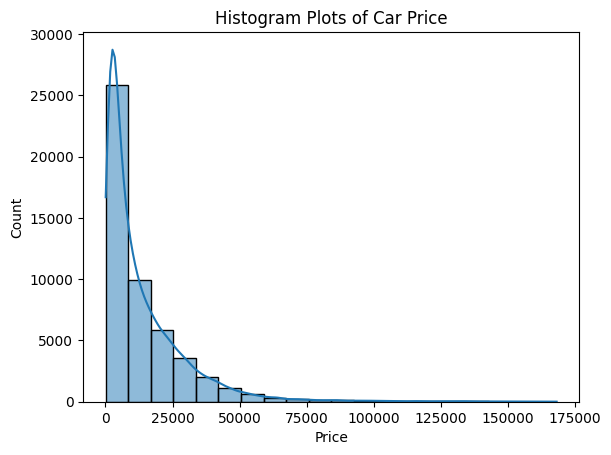

In [178]:
# Making A 1D Histogram of Price Of All Vehicles In The DataSet 
carPriceHistogram = sns.histplot(carSalesDataFrame['Price'], bins = 20, kde = True)
plt.title('Histogram Plots of Car Price')

The Price is skewed to the left and the data is not normally distributed. Majority of the prices fall within the range of 0 and 45000. There are few cars around the other prices. 

In [179]:
# Make this example reproduceable
np.random.seed(1)

In [180]:
# Shapiro-wilk test is used to test for normality. If p-value is greater than 0.5, it is said to be normally distributed
# Perform Shapiro-Wilk test for normality
shapiro(carSalesDataFrame['Price'])

ShapiroResult(statistic=0.7250890135765076, pvalue=0.0)

If the p-value is greater than 0.05, then the dataset is normally distributed(Symmetrical distributio). In this case  the dataset is not normally distributed but it is skewed to the left(the tail is in the left side).

In this case, we will report the mean, median and mode of the life expectancies.

In [181]:
carSalesDataFrame['Price'][(carSalesDataFrame['Price']>25000) & (carSalesDataFrame['Price']<50000)].count()

6847

In [182]:
print(f'The mean price of the Second Hand Vehicles:', carSalesDataFrame['Price'].mean().round(0))# Getting our mean
print(f'The median price of the Second Hand Vehicles:', round(carSalesDataFrame['Price'].median(),0)) # Getting our median
print(f'The most occuring price of the Second Hand Vehicles:', round(carSalesDataFrame['Price'].mode(),0)) # Getting our mode


The mean price of the Second Hand Vehicles: 13829.0
The median price of the Second Hand Vehicles: 7972.0
The most occuring price of the Second Hand Vehicles: 0    1610
Name: Price, dtype: int64


In [183]:
# Displaying the number of car above the mean price
sum(carSalesDataFrame['Price'] > carSalesDataFrame['Price'].mean())

17174

#### Checking how Price depends on our Other Variables

Text(0.5, 1.0, 'Plots of Car Price against Manufacturer')

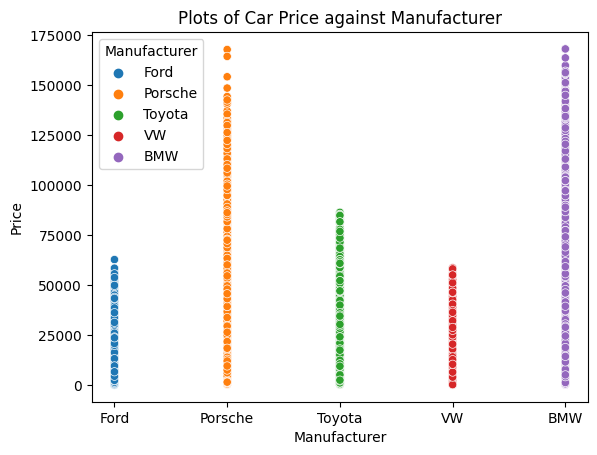

In [184]:
priceVSManufacturerPlot = sns.scatterplot(data = carSalesDataFrame, x = "Manufacturer",y = "Price", hue = "Manufacturer") # Plotting for Price(y-axis) and Manufacturer(x-axis)
plt.title('Plots of Car Price against Manufacturer')

Text(0.5, 1.0, 'Plots of Car Price against Model')

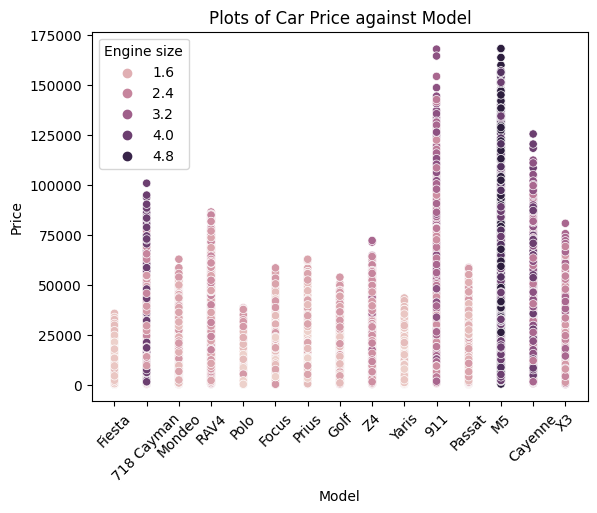

In [185]:
priceVSModelPlot = sns.scatterplot(data = carSalesDataFrame, x = "Model",y = "Price", hue = 'Engine size') # Plotting for Car Price(y-axis) and Model(x-axis)
priceVSModelPlot.set_xticklabels(priceVSModelPlot.get_xticklabels(),rotation = 45)
plt.title('Plots of Car Price against Model')

Text(0.5, 1.0, 'Plots of Car Price against Engine Size')

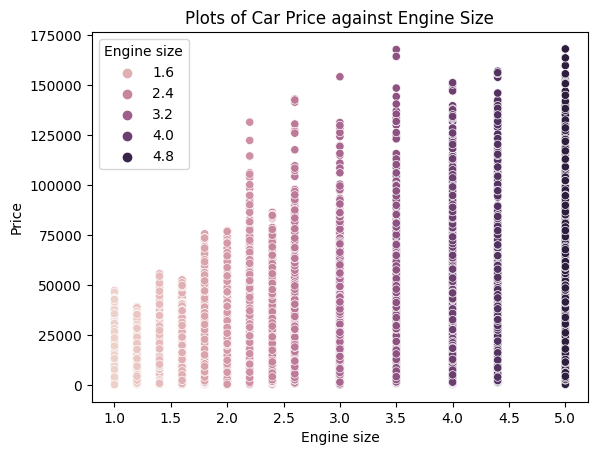

In [186]:
priceEngineSizePlot = sns.scatterplot(data = carSalesDataFrame, x = "Engine size",y = "Price", hue= 'Engine size') # Plotting for Price(y-axis) and Engine Size(x-axis)
plt.title('Plots of Car Price against Engine Size')

Text(0.5, 1.0, 'Plot of Car Price against Fuel Type')

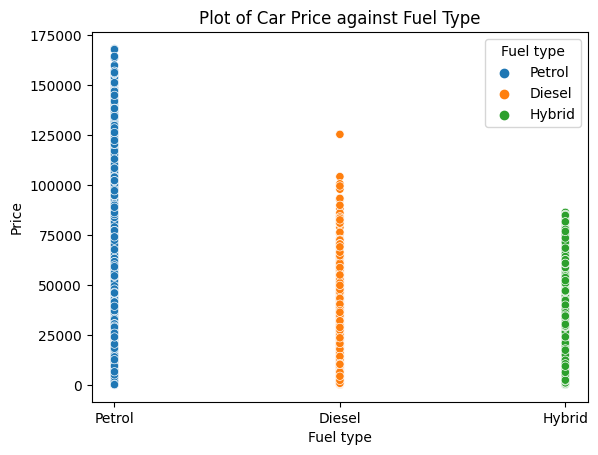

In [187]:
priceFuelTypePlot = sns.scatterplot(data = carSalesDataFrame, x = 'Fuel type',y = 'Price', hue = 'Fuel type') # Plotting for Price(y-axis) and Fuel Type(x-axis)
plt.title('Plot of Car Price against Fuel Type')

Text(0.5, 1.0, 'Plots of Car Price against Year of Manufacture')

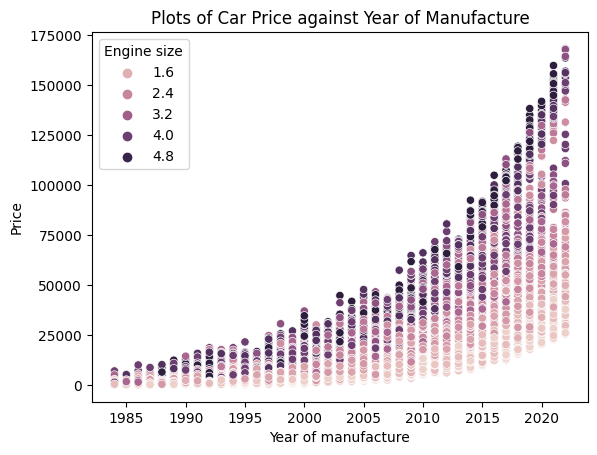

In [188]:
priceYearofManufacturePlot = sns.scatterplot(data = carSalesDataFrame, x = 'Year of manufacture',y = 'Price', hue = 'Engine size') # Plotting for Price(y-axis) and Year of Manufacture(x-axis)
plt.title('Plots of Car Price against Year of Manufacture')

Text(0.5, 1.0, 'Plots of Car Price against Mileage')

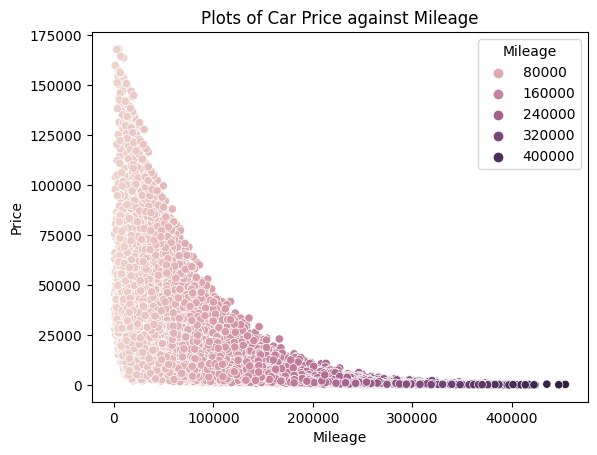

In [189]:
priceVSMileagePlot = sns.scatterplot(data = carSalesDataFrame, x = 'Mileage',y = 'Price', hue = 'Mileage') # Plotting for Price(y-axis) and Mileage(x-axis)
plt.title('Plots of Car Price against Mileage')

In [190]:
# A Correlation Table Showing the relationships between Numerical features
columnList = ["Price", "Engine size", "Year of manufacture","Mileage" ]
carSalesDataFrame[columnList].corr()


,Price,Engine size,Year of manufacture,Mileage
Price,1.000000,0.398371,0.714209,-0.632692
Engine size,0.398371,1.000000,-0.000675,0.004470
Year of manufacture,0.714209,-0.000675,1.000000,-0.807458
Mileage,-0.632692,0.004470,-0.807458,1.000000


In [191]:
# Heatmap Correlation plot to show the relationship Between Numerical Features
# numericalFeaturesHeatmapPlot = sns.heatmap(carSalesDataFrame.drop('Price', axis = 1).corr(), annot = True)
# plt.title('Heatmap of Car Price In Relation To Numerical Features')

Text(0.5, 1.0, 'Heatmap of Car Price In Relation To All Features')

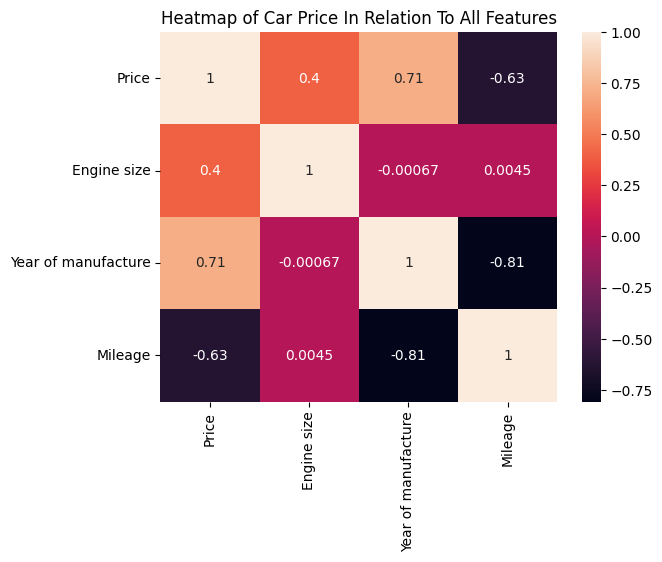

In [192]:
# Heatmap Correlation Plot Showing the relationships between All features
columnList2 = ["Price", "Manufacturer", "Model", "Engine size","Fuel type", "Year of manufacture","Mileage" ]
allFeaturesHeatmapPlot = sns.heatmap(carSalesDataFrame[columnList].corr(), annot = True)
plt.title('Heatmap of Car Price In Relation To All Features')

**The negative sign in the heatmap above shows that when one is going in the forward-upward direction the otehr is going in the downward-backward direction. So if one is increasing the other decreases(goes low).**

**Scatter plots are useful for comparing two quantitative (i.e. numerical) values. However, in its usage above some of the columns the dataset contain categorical data are qualitative labels rather than numbers.**

**A box plot to compare the distributions of Price base on categorical variables like the Fuel types, Car Model and Car Manufacturers.**

Text(0.5, 1.0, 'Boxplot Of Price Against Fuel type')

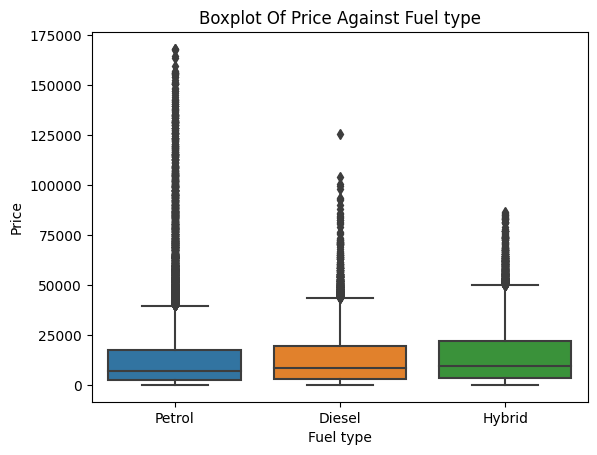

In [193]:
# Boxplot of relationship between Price and Fuel type
priceFuelTypeBoxplot = sns.boxplot(data = carSalesDataFrame, x = "Fuel type", y = "Price")
plt.title('Boxplot Of Price Against Fuel type')

Text(0.5, 1.0, 'Boxplot Of Price Against Model')

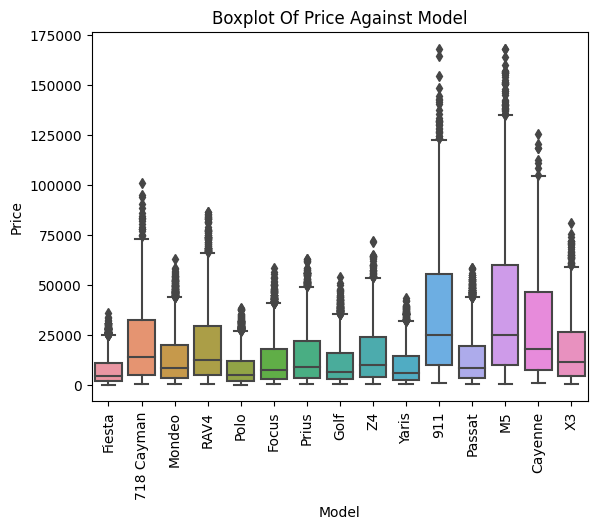

In [194]:
# Boxplot of relationship between Price and Model
priceModelBoxplot = sns.boxplot(data = carSalesDataFrame, x = "Model", y = "Price",)
priceModelBoxplot.set_xticklabels(priceModelBoxplot.get_xticklabels(),rotation = 'vertical')
plt.title('Boxplot Of Price Against Model')

Text(0.5, 1.0, 'Boxplot Of Price Against Manufacturer')

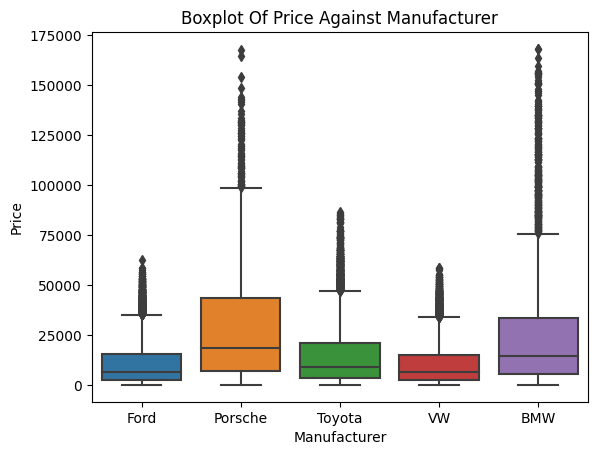

In [195]:
# Boxplot of relationship between Price and Manufacturer
priceManufacturerBoxplot = sns.boxplot(data = carSalesDataFrame, x = "Manufacturer", y = "Price")
plt.title('Boxplot Of Price Against Manufacturer')

### A. COMPARING SIMPLE LINEAR REGRESSION MODEL AND NON-LINEAR REGRESSION MODEL

#### a. Comparing regression models that can predict the price of a car based on a single numerical input feature. I will be using a _Simple Linear Regression Model_ first then a _Non-Linear Model(Polynomial)_

**A Simple Linear Regression Model: Price vs Mileage**

In [196]:
x = carSalesDataFrame["Mileage"] # For the x which is the input variable we use Mileage
y = carSalesDataFrame["Price"] # Our continous target or label

print(f"We have",x.shape,"rows in our input variable ") # 50000 Sample Rows from the Dataset

We have (50000,) rows in our input variable 


Since sklearn will expects the input data (x) to be in matrix form in rows and columns and our input data(x) is a single feature with only rows as shown above, we need to reshape the data so it has rows and columns.

In [197]:
x = x.to_numpy().reshape(-1, 1) # Converting or reshaping our sample rows to Matrix(rows and columns)
x.shape

(50000, 1)

Our data is now ready to be splitted into train set and test set using sklearn library

In [198]:
# We have imported the main machine learning library (sklearn)
xTrain, xTest, yTrain, yTest = train_test_split(
    x, 
    y, 
    test_size = 0.2, 
    random_state = 43 # Randomize dataset in a consistent manner using the number 43 and can be change to any other number
)# We split 80% of the data into the train dataset and 20% into test dataset 


**Now we will need to standardize by scaling our input features using the sklearn library again.**

In [199]:
# Standardizing our input features
# StandadrdScale has been IMported from sklearn.preprocessing
scale = StandardScaler() # Creating an instance of the StandardScaler class
scale.fit(xTrain) # Fit the instance to xTrain to avoid leakage

StandardScaler()

In [200]:
# We can now transform the datasets accordingly 
print(f'The mean and std deviations are:{scale.mean_} and {scale.scale_} respectively')
xTrainScaled = scale.transform(xTrain) # Scaling and Transforming training dataset
xTestScaled = scale.transform(xTest) #  Scaling and transforming testing dataset

The mean and std deviations are:[112481.7696] and [71716.00457428] respectively


**Let's create a simple linear regression model and fit our trained data to it**

In [201]:
# LinearRegression already Imported  from sklearn.linear_model 

priceMileageLinear = LinearRegression() # Creating  an Instance
priceMileageLinear.fit(xTrainScaled, yTrain) # Now we fit the instance

# Let's Print the gradient and Intercept
gradient = priceMileageLinear.coef_[0]
intercept = priceMileageLinear.intercept_
print('Gradient: ', gradient)
print('Intercept: ', intercept)

Gradient:  -10374.645897489898
Intercept:  13826.140325


**To know how well the model fit the data, we need to evaluate the model using the test dataset. I will calculate the predicted outputs from test dataset using the model.**

In [202]:
priceMileagePred = priceMileageLinear.predict(xTestScaled) # Predicting on the testset (Passing in Our testset for prediction) and saving it to variable priceMileagePred 

**Using the predicted output we can calculate for the following evaluation metrics:**

    •Mean absolute error (MAE).

    •Mean squared error (MSE).

    •Root mean squared error (RMSE).

    •Coefficient of determination (R2).


In [203]:
# mean_absolute_error(MAE), mean_squared_error(MSE) and R2Score imported from sklearn
# import numpy as np # Importing numpy import 
mae = mean_absolute_error(yTest, priceMileagePred) # Evaluating for MAE using y_test and the Life Prediction value
mse = mean_squared_error(yTest, priceMileagePred)  # Evaluating for MSE using y_test and the Life Prediction value

rmse = np.sqrt(mse)  # Evaluating for RMSE
rmse2 = mean_squared_error(yTest, priceMileagePred, squared = False)  # Evaluating for RMSE using y_test and the Life Prediction value. put squared = False to stop squaring
r2 = r2_score(yTest, priceMileagePred) # Evaluating for R2Score using y_test and the Life Prediction value
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'R2:{r2:.2f}')

MAE:7966.36
MSE:160505323.36
RMSE:12669.07
R2:0.40


    To know how good your data is depends on the condition you are working with. If condition was 0.15 then we might say our model is good otherwise it might be bad.

    A good model depends on the nature of your data and the specific requirements of your task.

**Let's create an array of x values spanning the range of Mileage found in our dataset and then predict corresponding y(Price) values using linear model below:**

In [204]:
# You can plot a sample that you have like below
xFit = carSalesDataFrame[["Mileage"]]

# Or you can plot it for data in the range of samples like below it is the same thing with the above 
xMileageFit = np.arange(0, 50000, 1).reshape(-1, 1)
xMileageFitScaled = scale.transform(xMileageFit)
yPriceFit = priceMileageLinear.predict(xMileageFitScaled)

Text(0.5, 1.0, 'ScatterPlot Of Scaled Price Against Mileage')

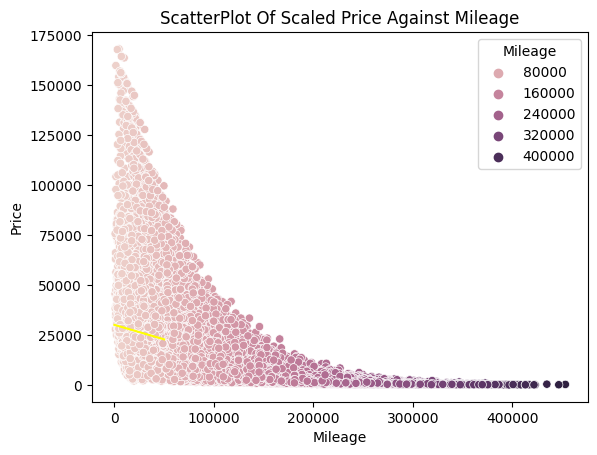

In [205]:
priceMileageScatterplot = sns.scatterplot(data = carSalesDataFrame, x = 'Mileage', y = 'Price', hue = 'Mileage')
plt.plot(xMileageFit, yPriceFit, color = 'yellow')
plt.title('ScatterPlot Of Scaled Price Against Mileage')

    High recedual or error on the left. The samples are far from the line that pass through it. This shows that it is not doing well as indicated by the R-squared

**A Non-Linear(Polynomial) Regression Model: Price vs Mileage**

In [206]:
########################from sklearn.preprocessing import PolynomialFeatures
polynomialRegressionModel = PolynomialFeatures(degree = 2, include_bias = False)
xPolyTrain = polynomialRegressionModel.fit_transform(xTrainScaled) # Fiting and transforming our scaled x_train
xPolyTest = polynomialRegressionModel.transform(xTestScaled)  # Transforming our scaled x_test

priceMileagePolynomial = LinearRegression()
priceMileagePolynomial.fit(xPolyTrain, yTrain)

LinearRegression()

In [207]:
print('Intercept: ', priceMileagePolynomial.intercept_)
print('Coefficient: ', priceMileagePolynomial.coef_)

priceMileagePolynomialPred = priceMileagePolynomial.predict(xPolyTest)

mae = mean_absolute_error(yTest, priceMileagePolynomialPred)
mse = mean_squared_error(yTest, priceMileagePolynomialPred)
rmse = np.sqrt(mse)
r2 = r2_score(yTest, priceMileagePolynomialPred)
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'R2:{r2:.2f}')

Intercept:  9350.158319599577
Coefficient:  [-13650.36443375   4475.9820054 ]
MAE:6419.66
MSE:129210094.58
RMSE:11367.06
R2:0.52


**A Simple Linear Regression Model: Price vs Year of Manufacture**

In [208]:
x = carSalesDataFrame['Year of manufacture'] # For the x which is the input variable we use Year of manufacture
y = carSalesDataFrame['Price'] # Our continous target or label

print(f'We have',x.shape,'rows in our input variable') # 50000 Sample Rows from the Dataset


We have (50000,) rows in our input variable


In [209]:
x = x.to_numpy().reshape(-1, 1) # Converting or reshaping our sample rows to Matrix(rows and columns)
x.shape


(50000, 1)

In [210]:
xTrain, xTest, yTrain, yTest = train_test_split(
    x, 
    y, 
    test_size = 0.2, 
    random_state = 43 # Randomize dataset in a consistent manner using the number 43 and can be change to any other number
)# We split 80% of the data into the train dataset and 20% into test dataset 

from sklearn.preprocessing import StandardScaler

scale = StandardScaler() # Creating an instance of the StandardScaler class
scale.fit(xTrain) # Fit the instance to xTrain to avoid leakage


StandardScaler()

In [211]:
# We can now transform the datasets accordingly 
print(f'The mean and std deviations are:{scale.mean_} and {scale.scale_} respectively')
xTrainScaled = scale.transform(xTrain) # Scaling and Transforming training dataset
xTestScaled = scale.transform(xTest) #  Scaling and transforming testing dataset


The mean and std deviations are:[2004.22235] and [9.64827241] respectively


In [212]:
priceYearofmanufactureLinear = LinearRegression() # Creating  an Instance
priceYearofmanufactureLinear.fit(xTrainScaled, yTrain) # Now we fit the instance


LinearRegression()

In [213]:
# Let's Print the gradient an dIntercept
gradient = priceYearofmanufactureLinear.coef_[0]
intercept = priceYearofmanufactureLinear.intercept_
print('Gradient: ', gradient)
print('Intercept: ', intercept)

Gradient:  11720.633402589476
Intercept:  13826.140325000008


In [214]:
priceYearofmanufacturePred = priceYearofmanufactureLinear.predict(xTestScaled) # Predicting on the testset (Passing in Our testset for prediction)
                                                                               # And saving it to variable priceYearofmanufacturePred 


In [215]:
mae = mean_absolute_error(yTest, priceYearofmanufacturePred) # Evaluating for MAE using y_test and the Year of manufacture value
mse = mean_squared_error(yTest, priceYearofmanufacturePred)  # Evaluating for MSE using y_test and the Year of manufacture value

rmse = np.sqrt(mse)  # Evaluating for RMSE
rmse2 = mean_squared_error(yTest, priceYearofmanufacturePred, squared = False)  # Evaluating for RMSE using y_test and the Life Prediction value. put squared = False to stop squaring
r2 = r2_score(yTest, priceYearofmanufacturePred)  # Evaluating for R2Score using y_test and the Life Prediction value
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'R2:{r2:.2f}')

MAE:7015.60
MSE:131512598.01
RMSE:11467.89
R2:0.51


In [216]:
# You can plot a sample that you have like below
xFit = carSalesDataFrame[['Year of manufacture']]

# Or you can plot it for data in the range of samples like below it is the same thing with the above 
xYearofmanufactureFit = np.arange(0, 50000, 1).reshape(-1, 1)
xYearofmanufactureFitScaled = scale.transform(xYearofmanufactureFit)
yPriceFit = priceMileageLinear.predict(xYearofmanufactureFitScaled)

Text(0.5, 1.0, 'ScatterPlot Of Scaled Price Against Year of Manufacture')

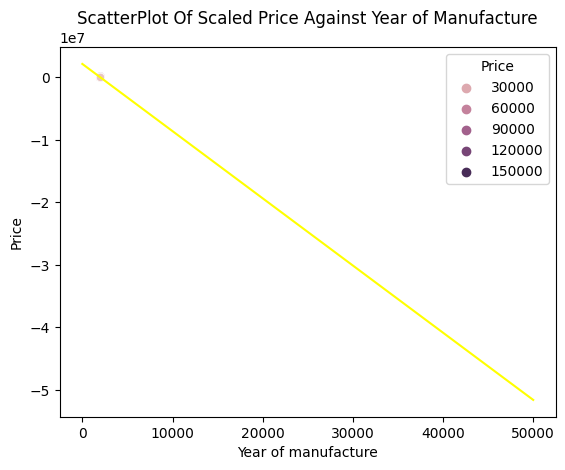

In [217]:
priceYearofManfactureScatterplot = sns.scatterplot(data = carSalesDataFrame, x = 'Year of manufacture', y = 'Price', hue = 'Price')
plt.plot(xYearofmanufactureFit, yPriceFit, color = 'yellow')
plt.title('ScatterPlot Of Scaled Price Against Year of Manufacture')

**A Non-Linear(Polynomial) Regression Model: Price vs Year of manufacture**


In [218]:
########################from sklearn.preprocessing import PolynomialFeatures
polynomialRegressionModel = PolynomialFeatures(degree = 2, include_bias = False)
xPolyTrain = polynomialRegressionModel.fit_transform(xTrainScaled) # Fiting and transforming our scaled x_train
xPolyTest = polynomialRegressionModel.transform(xTestScaled)  # Transforming our scaled x_test
priceYearofmanufacturePolynomial = LinearRegression()
priceYearofmanufacturePolynomial.fit(xPolyTrain, yTrain)


LinearRegression()

In [219]:
print('Intercept: ', priceYearofmanufacturePolynomial.intercept_)
print('Coefficient: ', priceYearofmanufacturePolynomial.coef_)


Intercept:  8508.878526828697
Coefficient:  [12058.81216571  5317.26179817]


In [220]:
priceYearofmanufacturePolynomialPred = priceYearofmanufacturePolynomial.predict(xPolyTest)
mae = mean_absolute_error(yTest, priceYearofmanufacturePolynomialPred)
mse = mean_squared_error(yTest, priceYearofmanufacturePolynomialPred)
rmse = np.sqrt(mse)
r2 = r2_score(yTest, priceYearofmanufacturePolynomialPred)
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'R2:{r2:.2f}')

MAE:5416.96
MSE:106389968.22
RMSE:10314.55
R2:0.61


**A Simple Linear Regression Model: Price vs Engine Size**

In [221]:
x = carSalesDataFrame['Engine size'] # For the x which is the input variable we use Mileage
y = carSalesDataFrame['Price'] # Our continous target or label

print(f'We have',x.shape,'rows in our input variable ') # 50000 Sample Rows from the Dataset


We have (50000,) rows in our input variable 


In [222]:
x = x.to_numpy().reshape(-1, 1) # Converting or reshaping our sample rows to Matrix(rows and columns)
x.shape


(50000, 1)

In [223]:
xTrain, xTest, yTrain, yTest = train_test_split(
    x, 
    y, 
    test_size = 0.2, 
    random_state = 43 # Randomize dataset in a consistent manner using the number 43 and can be change to any other number
)# We split 80% of the data into the train dataset and 20% into test dataset 

scale = StandardScaler() # Creating an instance of the StandardScaler class
scale.fit(xTrain) # Fit the instance to xTrain to avoid leakage


StandardScaler()

In [224]:
# We can now transform the datasets accordingly 
print(f'The mean and std deviations are:{scale.mean_} and {scale.scale_} respectively')
xTrainScaled = scale.transform(xTrain) # Scaling and Transforming training dataset
xTestScaled = scale.transform(xTest) #  Scaling and transforming testing dataset


The mean and std deviations are:[1.7717] and [0.73275754] respectively


In [225]:
priceEnginesizeLinear = LinearRegression() # Creating  an Instance
priceEnginesizeLinear.fit(xTrainScaled, yTrain) # Now we fit the instance


LinearRegression()

In [226]:
# Let's Print the gradient an dIntercept
gradient = priceEnginesizeLinear.coef_[0]
intercept = priceEnginesizeLinear.intercept_
print('Gradient: ', gradient)
print('Intercept: ', intercept)


Gradient:  6572.307853128499
Intercept:  13826.140325


In [227]:
priceEnginesizePred = priceEnginesizeLinear.predict(xTestScaled) # Predicting on the testset (Passing in Our testset for prediction) 
                                                                 # and saving it to variable priceEnginesizePred 

In [228]:

mae = mean_absolute_error(yTest, priceEnginesizePred) # Evaluating for MAE using y_test and the Price value
mse = mean_squared_error(yTest, priceEnginesizePred)  # Evaluating for MSE using y_test and the Price value

rmse = np.sqrt(mse)  # Evaluating for RMSE
rmse2 = mean_squared_error(yTest, priceEnginesizePred, squared = False)  # Evaluating for RMSE using y_test and the Life Prediction value. put squared = False to stop squaring
r2 = r2_score(yTest, priceEnginesizePred)  # Evaluating for R2Score using y_test and the Life Prediction value
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'R2:{r2:.2f}')


MAE:10816.92
MSE:228317759.71
RMSE:15110.19
R2:0.15


In [229]:
# You can plot a sample that you have like below
xFit = carSalesDataFrame[['Engine size']]


In [230]:
# Or you can plot it for data in the range of samples like below it is the same thing with the above 
xEnginesizeFit = np.arange(0, 5, 1).reshape(-1, 1)
xEnginesizeFitScaled = scale.transform(xEnginesizeFit)
yPriceFit = priceEnginesizeLinear.predict(xEnginesizeFitScaled)


Text(0.5, 1.0, 'ScatterPlot Of Scaled Price Against Engine Size')

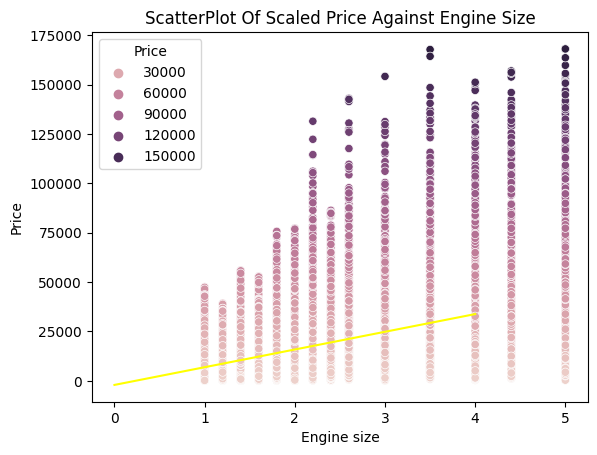

In [231]:
priceEngineSizeScatterplot = sns.scatterplot(data = carSalesDataFrame, x = 'Engine size', y = 'Price', hue = 'Price')
plt.plot(xEnginesizeFit, yPriceFit, color = 'yellow')
plt.title('ScatterPlot Of Scaled Price Against Engine Size')

**A Non-Linear(Polynomial) Regression Model: Price vs Engine Size**

In [232]:
polynomialRegressionModel = PolynomialFeatures(degree = 2, include_bias = False)
xPolyTrain = polynomialRegressionModel.fit_transform(xTrainScaled) # Fiting and transforming our scaled x_train
xPolyTest = polynomialRegressionModel.transform(xTestScaled)  # Transforming our scaled x_test

priceEnginesizePolynomial = LinearRegression()
priceEnginesizePolynomial.fit(xPolyTrain, yTrain)


LinearRegression()

In [233]:
print('Intercept: ', priceEnginesizePolynomial.intercept_)
print('Coefficient: ', priceEnginesizePolynomial.coef_)

priceEnginesizePolynomialPred = priceEnginesizePolynomial.predict(xPolyTest)
mae = mean_absolute_error(yTest, priceEnginesizePolynomialPred)
mse = mean_squared_error(yTest, priceEnginesizePolynomialPred)
rmse = np.sqrt(mse)
r2 = r2_score(yTest, priceEnginesizePolynomialPred)
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'R2:{r2:.2f}')

Intercept:  13551.984599303145
Coefficient:  [6001.43987349  274.1557257 ]
MAE:10813.44
MSE:228402862.05
RMSE:15113.00
R2:0.15


### B. MULTIPLE LINEAR REGRESSION MODEL

**b.Now I will be considering using regression models that takes multiple numerical variables as input features to predict the price of a car** 

In [234]:
inputFeatures = ['Mileage', 'Year of manufacture', 'Engine size'] # Our Features
x = carSalesDataFrame[inputFeatures]

In [235]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42) # We split 80% of the data into the train dataset and 20% into test dataset 

In [236]:
scale = StandardScaler() # Creating an instance of the standardscaler class
# scale.fit(x)
# calling scale.fit(x) leads to leakage as it is called on the entire data set
# And we have avoid that by calling it on only xTrain instead of the entire dataset
scale.fit(xTrain) # Fitting instance to xTrain to avoid leakage, it is important to scale with multiple Features unlike with linear regression where it's not necessary

print(f'The mean and std deviations are:{scale.mean_} and {scale.scale_} respectively')

xTrainScaled = scale.transform(xTrain) # Scaling Training Dataset
xTestScaled = scale.transform(xTest)  # Scaling Testing Dataset

The mean and std deviations are:[1.12217774e+05 2.00423325e+03 1.77322500e+00] and [7.15643626e+04 9.64271199e+00 7.38249009e-01] respectively


In [237]:
priceMultiLinear = LinearRegression() # Creating an instance
priceMultiLinear.fit(xTrainScaled, yTrain) # Fitting the instance created

LinearRegression()

In [238]:
# Print Gradient and Intercept
gradient = priceMultiLinear.coef_ # By specifying zero [0] only 1 gradient(The 1st one) is printed if we should do it this way: "gradient = life_linear.coef_" all 3 coef will be printed
intercept = priceMultiLinear.intercept_
print('Gradient: ', gradient)
print('Intercept: ', intercept)

Gradient:  [-2720.41736808  9520.41488938  6594.02448017]
Intercept:  13854.628699999997


In [239]:
priceMultiLinearPred = priceMultiLinear.predict(xTestScaled)
# Importing numpy, as we've done above
mae = mean_absolute_error(yTest, priceMultiLinearPred)
mse = mean_squared_error(yTest, priceMultiLinearPred)
rmse = np.sqrt(mse)
r2 = r2_score(yTest, priceMultiLinearPred)
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'R2:{r2:.2f}')

MAE:6091.46
MSE:89158615.76
RMSE:9442.38
R2:0.67


### C. A RANDOM FOREST REGRESSOR MODEL

**c. In parts (a) and (b) models that use the numerical variables from the dataset as inputs were considered. However, there are also several categorical variables in the dataset that are likely to affect the price of the car. Now train a regression model that uses all relevant input variables (both categorical and numerical) to predict the price (e.g. a Random Forest Regressor model). Does this improve the accuracy of your results?**

In [240]:
# Load and Prepare Data
X = carSalesDataFrame[['Engine size', 'Year of manufacture', 'Mileage', 
        'Manufacturer', 'Model', 'Fuel type']]

In [241]:
y = carSalesDataFrame['Price']

In [242]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['Manufacturer', 'Model', 'Fuel type']:
    X[col] = label_encoder.fit_transform(X[col])

In [243]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
# Build and Train the Random Forest Model
priceRandomForestModel = RandomForestRegressor(n_estimators=100, random_state=42)
priceRandomForestModel.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [245]:
# Evaluate the Model using R2 and MSE
y_pred = priceRandomForestModel.predict(X_test)

In [246]:
# Accessing Important Input Features
importantFeatures = priceRandomForestModel.feature_importances_

In [247]:
# Printing the importance feature importances
for i, importance in enumerate(importantFeatures):
    print(f"Feature {i + 1}: {importance}")

Feature 1: 0.2647150610407979
Feature 2: 0.6183097771893444
Feature 3: 0.041549357832608554
Feature 4: 0.005726353925746938
Feature 5: 0.05772945428195189
Feature 6: 0.011969995729550174


In [248]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

R2 Score: 0.9982468229900868
Mean Absolute Error: 332.45727999999997
Mean Squared Error: 475768.78947792
Root Mean Squared Error: 689.7599506189962


### D.  DEVELOP ARTIFICIAL NEURAL NETWORK

##### ANN MODEL FOR PRICE PREDICTION(PRICE AGAINST NUMERICAL FEATURES)

In [249]:
featureNames = ['Engine size', 'Year of manufacture', 'Mileage'] # List of features to work with in training
x = carSalesDataFrame[featureNames] # extracted features in dataframe
x.head()

,Engine size,Year of manufacture,Mileage
0,1.0,2002,127300
1,4.0,2016,57850
2,1.6,2014,39190
3,1.8,1988,210814
4,1.0,2006,127869


In [250]:
y = carSalesDataFrame['Price']  # extracted target for the prediction in series form
y[:7] #Print the first 7 samples

0     3074
1    49704
2    24072
3     1705
4     4101
5    29204
6    14350
Name: Price, dtype: int64

In [251]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42) # 80% for training and 20% for test data
scale = MinMaxScaler() # Creating an instance of the minMaxScaler
scale.fit(x_train) # Learning the min and max for scaling
x_train_scaled = scale.transform(x_train) # Applying the min-max values learnt to scale the x_train dataset
x_test_scaled = scale.transform(x_test)    # Applying the min-max values learnt to scale the x_test dataset

In [252]:
x_train.shape # Get Shape of the data

(40000, 3)

#### Contructor Stage

In [253]:
model = Sequential() # creating instance of thesequential layer
model.add(Dense(units = 64, input_dim = (3), activation = 'relu'))  # units: number of neurons, input_dim: number of features
model.add(Dropout(0.2)) # Dropping 20% of the neurons when training (for regularization)
model.add(Dense(units = 64, activation = 'relu')) # The second hidden layer
model.add(Dense(units = 64, activation = 'relu')) # The third hidden layer
model.add(Dense(units = 1, activation = 'linear'))
model.summary() # printing summary of the model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                256       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________


##### Compilation/Regularization Stage

In [254]:
# We specify the optimizer as rmsprop, loss as mean_squared_error, metrics as mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_squared_error')
# Early stopping for regularisation
early_stopping = EarlyStopping(monitor='val_loss', patience = 65) # we want to monitor the validation loss and if no changesfor 20 epochs stop

##### Training Stage

In [255]:
# This saves the training loss and accuracy, validation loss and accuracy into history
history = model.fit(x = x_train_scaled, y = y_train,
                    batch_size = None, epochs = 200,
                    verbose = 'auto', validation_split = 0.1,
                    callbacks = [early_stopping])

Epoch 1/200
1125/1125 [==============================] - 2s 1ms/step - loss: 208548352.0000 - mean_squared_error: 208548352.0000 - val_loss: 65355616.0000 - val_mean_squared_error: 65355616.0000
Epoch 2/200
1125/1125 [==============================] - 1s 1ms/step - loss: 48962456.0000 - mean_squared_error: 48962456.0000 - val_loss: 31107356.0000 - val_mean_squared_error: 31107356.0000
Epoch 3/200
1125/1125 [==============================] - 1s 945us/step - loss: 32653170.0000 - mean_squared_error: 32653170.0000 - val_loss: 24917886.0000 - val_mean_squared_error: 24917886.0000
Epoch 4/200
1125/1125 [==============================] - 1s 927us/step - loss: 28628842.0000 - mean_squared_error: 28628842.0000 - val_loss: 23029412.0000 - val_mean_squared_error: 23029412.0000
Epoch 5/200
1125/1125 [==============================] - 1s 906us/step - loss: 27021844.0000 - mean_squared_error: 27021844.0000 - val_loss: 22215452.0000 - val_mean_squared_error: 22215452.0000
Epoch 6/200
1125/1125 [====

Epoch 43/200
1125/1125 [==============================] - 1s 926us/step - loss: 22535122.0000 - mean_squared_error: 22535122.0000 - val_loss: 19217550.0000 - val_mean_squared_error: 19217550.0000
Epoch 44/200
1125/1125 [==============================] - 1s 976us/step - loss: 22060756.0000 - mean_squared_error: 22060756.0000 - val_loss: 19497726.0000 - val_mean_squared_error: 19497726.0000
Epoch 45/200
1125/1125 [==============================] - 1s 968us/step - loss: 22178740.0000 - mean_squared_error: 22178740.0000 - val_loss: 19526546.0000 - val_mean_squared_error: 19526546.0000
Epoch 46/200
1125/1125 [==============================] - 1s 886us/step - loss: 22294522.0000 - mean_squared_error: 22294522.0000 - val_loss: 19082910.0000 - val_mean_squared_error: 19082910.0000
Epoch 47/200
1125/1125 [==============================] - 1s 885us/step - loss: 22000348.0000 - mean_squared_error: 22000348.0000 - val_loss: 19209690.0000 - val_mean_squared_error: 19209690.0000
Epoch 48/200
1125/11

Epoch 85/200
1125/1125 [==============================] - 1s 876us/step - loss: 21791232.0000 - mean_squared_error: 21791232.0000 - val_loss: 19311084.0000 - val_mean_squared_error: 19311084.0000
Epoch 86/200
1125/1125 [==============================] - 1s 880us/step - loss: 21570568.0000 - mean_squared_error: 21570568.0000 - val_loss: 18973662.0000 - val_mean_squared_error: 18973662.0000
Epoch 87/200
1125/1125 [==============================] - 1s 1ms/step - loss: 21991122.0000 - mean_squared_error: 21991122.0000 - val_loss: 19178208.0000 - val_mean_squared_error: 19178208.0000
Epoch 88/200
1125/1125 [==============================] - 1s 953us/step - loss: 21474020.0000 - mean_squared_error: 21474020.0000 - val_loss: 19167408.0000 - val_mean_squared_error: 19167408.0000
Epoch 89/200
1125/1125 [==============================] - 1s 881us/step - loss: 21547534.0000 - mean_squared_error: 21547534.0000 - val_loss: 19289282.0000 - val_mean_squared_error: 19289282.0000
Epoch 90/200
1125/1125

Epoch 127/200
1125/1125 [==============================] - 1s 848us/step - loss: 20898818.0000 - mean_squared_error: 20898818.0000 - val_loss: 22350828.0000 - val_mean_squared_error: 22350828.0000
Epoch 128/200
1125/1125 [==============================] - 1s 858us/step - loss: 20962434.0000 - mean_squared_error: 20962434.0000 - val_loss: 20265630.0000 - val_mean_squared_error: 20265630.0000
Epoch 129/200
1125/1125 [==============================] - 1s 853us/step - loss: 21016758.0000 - mean_squared_error: 21016758.0000 - val_loss: 23069448.0000 - val_mean_squared_error: 23069448.0000
Epoch 130/200
1125/1125 [==============================] - 1s 865us/step - loss: 20901430.0000 - mean_squared_error: 20901430.0000 - val_loss: 21624560.0000 - val_mean_squared_error: 21624560.0000
Epoch 131/200
1125/1125 [==============================] - 1s 843us/step - loss: 20936876.0000 - mean_squared_error: 20936876.0000 - val_loss: 21574002.0000 - val_mean_squared_error: 21574002.0000
Epoch 132/200
1

##### Evaluation Stage

In [256]:
yPrediction = model.predict(x_test_scaled) # prediction on the x test

313/313 [==============================] - 0s 578us/step


In [257]:
model.evaluate(x_test_scaled, y_test, return_dict = True)
loss, mse = model.evaluate(x_test, y_test)
r2Score = r2_score(y_test, yPrediction)

313/313 [==============================] - 0s 635us/step - loss: 18122915153182720.0000 - mean_squared_error: 18122915153182720.0000


In [258]:
print('R2 Score:', r2Score)
print('The Loss:', loss)
# print(f'Mean Absolute Error on the test set: {mae}')
print(f'Mean Squared Error on the test set: {mse}')
rmse = np.sqrt(loss)
print(f'Root Mean Squared Error on the test set: {rmse}')

R2 Score: 0.9151232182648693
The Loss: 1.812291515318272e+16
Mean Squared Error on the test set: 1.812291515318272e+16
Root Mean Squared Error on the test set: 134621377.02899462


In [259]:
# Reshaping for y_pred so we can plot the predicted Price using seaborn scatterplot
yPredictionShaped = yPrediction.reshape(len(y_pred)) # Converted to 1d array
yPredictionShaped.shape

(10000,)

##### Visualization Stage

Text(0.5, 1.0, 'ScatterPlot Of Predicted Price Against Price')

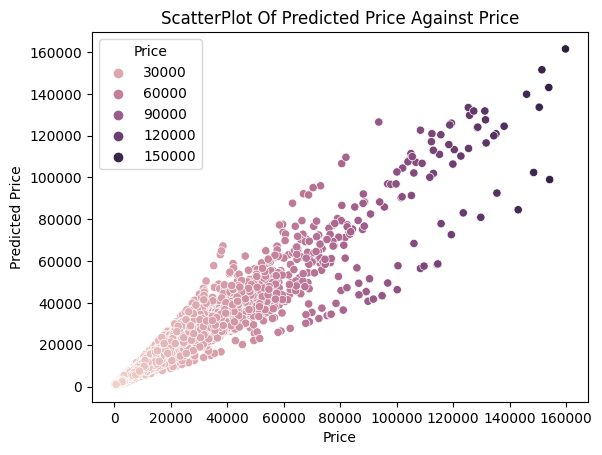

In [260]:
ANNModelOneScatterPlot = sns.scatterplot(x=y_test, y=yPredictionShaped, hue = y_test)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('ScatterPlot Of Predicted Price Against Price')

In [261]:
# Next, plot the history of the training and validation losses against the epoch.
history_df = pd.DataFrame(history.history) # converting measures to dataframe    
history_df

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,208548352.0,208548352.0,65355616.0,65355616.0
1,48962456.0,48962456.0,31107356.0,31107356.0
2,32653170.0,32653170.0,24917886.0,24917886.0
3,28628842.0,28628842.0,23029412.0,23029412.0
4,27021844.0,27021844.0,22215452.0,22215452.0
...,...,...,...,...
146,20790448.0,20790448.0,20334652.0,20334652.0
147,20998382.0,20998382.0,22563946.0,22563946.0
148,20664168.0,20664168.0,21144052.0,21144052.0
149,20921384.0,20921384.0,23659976.0,23659976.0


Text(0.5, 1.0, 'Model 1 Plot Of Loss and Validation Loss For Training and Validation')

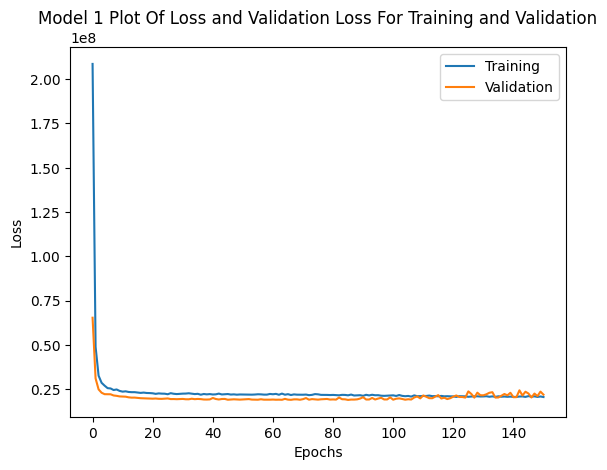

In [262]:
plt.plot(history_df['loss'], label = 'Training')
plt.plot(history_df['val_loss'], label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # print the labels in plot() above
plt.title('Model 1 Plot Of Loss and Validation Loss For Training and Validation')

**No sign of over or under-fitting, as both training and test validation are not displaced from one another.
But there seems to be some sign of over-fitting as both data are not fully allign together.
    Over fitting is when you have a difference between the Training and Validation**
    
**The early stopping criterion was not triggered when I trained the model, it did  use the full 50 epochs for the training without stopping training early?**

## **~............................................................................................~**

##### ANN MODEL FOR PRICE PREDICTION(PRICE BASED ON NUMERICAL AND CATEGORICAL FEATURES)

In [263]:
# Step 1: Prepare the data
numericalFeatures = ['Engine size', 'Year of manufacture', 'Mileage']
categoricalFeatures = ['Manufacturer', 'Model', 'Fuel type']
targetVariable = 'Price'

x = carSalesDataFrame[numericalFeatures]
y_cat = carSalesDataFrame[categoricalFeatures]
y_num = carSalesDataFrame[targetVariable]

# Step 2: Preprocess the data
# Encode categorical variables using LabelEncoder
label_encoders = {}
for cat_column in categoricalFeatures:
    label_encoder = LabelEncoder()
    y_cat[cat_column] = label_encoder.fit_transform(y_cat[cat_column])
    label_encoders[cat_column] = label_encoder

# Standardize numerical features
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

# Combine the standardized numerical features with the encoded categorical features
x_combined = pd.concat([pd.DataFrame(x_standardized, columns=numericalFeatures), y_cat], axis=1)

# Step 3: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_combined, y_num, test_size=0.2, random_state=42)





#### Contructor Stage

In [264]:
# Builiding the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(x_combined.shape[1],)))
model.add(Dropout(0.2)) # Dropping 20% of the neurons when training (for regularization)
model.add(Dense(units = 64, activation = 'relu')) # The second hidden layer
model.add(Dense(units = 64, activation = 'relu')) # The third hidden layer
model.add(Dense(units = 1, activation = 'linear'))
model.summary() # printing summary of the model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                448       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


##### Compilation/Regularization Stage

In [327]:
# We specify the optimizer as rmsprop, loss as mean_squared_error, metrics as mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
# Early stopping for regularisation
earlyStopping = EarlyStopping(monitor='val_loss', patience = 10) # we want to monitor the validation loss and if no changesfor 20 epochs stop


##### Training Stage

In [266]:

history = model.fit(x_train, y_train, 
                    epochs=200, batch_size=None, 
                    verbose = 'auto', validation_split=0.1, 
                    callbacks = [earlyStopping])



Epoch 1/200
1125/1125 [==============================] - 2s 967us/step - loss: 137803232.0000 - mean_absolute_error: 6343.9502 - val_loss: 31860394.0000 - val_mean_absolute_error: 3216.1367
Epoch 2/200
1125/1125 [==============================] - 1s 858us/step - loss: 32587062.0000 - mean_absolute_error: 3206.1077 - val_loss: 25612648.0000 - val_mean_absolute_error: 2921.1218
Epoch 3/200
1125/1125 [==============================] - 1s 955us/step - loss: 28322162.0000 - mean_absolute_error: 2975.5359 - val_loss: 22750128.0000 - val_mean_absolute_error: 2646.7573
Epoch 4/200
1125/1125 [==============================] - 1s 850us/step - loss: 26251284.0000 - mean_absolute_error: 2823.0232 - val_loss: 20965006.0000 - val_mean_absolute_error: 2545.5884
Epoch 5/200
1125/1125 [==============================] - 1s 863us/step - loss: 24928982.0000 - mean_absolute_error: 2709.0264 - val_loss: 19915916.0000 - val_mean_absolute_error: 2514.3674
Epoch 6/200
1125/1125 [==============================]

1125/1125 [==============================] - 1s 871us/step - loss: 13461196.0000 - mean_absolute_error: 2035.7955 - val_loss: 11168638.0000 - val_mean_absolute_error: 1862.4423
Epoch 88/200
1125/1125 [==============================] - 1s 877us/step - loss: 13141281.0000 - mean_absolute_error: 2018.3820 - val_loss: 11705026.0000 - val_mean_absolute_error: 1898.2582
Epoch 89/200
1125/1125 [==============================] - 1s 868us/step - loss: 13239159.0000 - mean_absolute_error: 2020.2964 - val_loss: 10401390.0000 - val_mean_absolute_error: 1812.5518
Epoch 90/200
1125/1125 [==============================] - 1s 877us/step - loss: 12842401.0000 - mean_absolute_error: 2005.8162 - val_loss: 11502141.0000 - val_mean_absolute_error: 1918.3474
Epoch 91/200
1125/1125 [==============================] - 1s 903us/step - loss: 12898280.0000 - mean_absolute_error: 2006.7893 - val_loss: 10095820.0000 - val_mean_absolute_error: 1798.5027
Epoch 92/200
1125/1125 [==============================] - 1s 88

##### Evaluation Stage

In [328]:
# Making predictions
predictions = model.predict(x_test)

313/313 [==============================] - 0s 780us/step


In [331]:
# Lets evaluate our model
loss, mean_absolute_error = model.evaluate(x_test, y_test)
r2Score = r2_score(y_test, predictions)

313/313 [==============================] - 0s 722us/step - loss: 15644549.0000 - mean_squared_error: 15644549.0000


In [332]:
print('R2 Score:', r2Score)
print('The Loss:', loss)
print('Mean Squared Error:', mean_absolute_error)
rmse = np.sqrt(mean_absolute_error)
print(f"Root Mean Squared Error on the test set: {rmse}")

R2 Score: 0.9423508383444814
The Loss: 15644549.0
Mean Squared Error: 15644549.0
Root Mean Squared Error on the test set: 3955.3190768887407


In [333]:
# Reshaping for y_pred so we can plot the predicted Price using seaborn scatterplot
predictionsReshape = predictions.reshape(len(predictions)) # Converted to 1d array
predictionsReshape.shape

(10000,)

##### Visualization Stage

Text(0.5, 1.0, 'ScatterPlot Of Predicted Price Against Price')

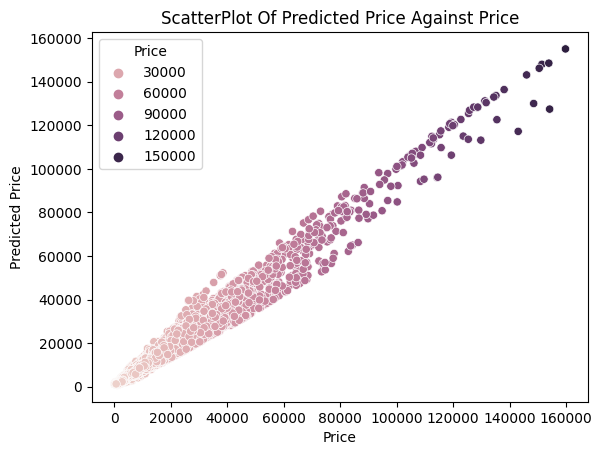

In [271]:
ANNModelTwoScatterPlot = sns.scatterplot(x=y_test, y=predictionsReshape, hue=y_test)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('ScatterPlot Of Predicted Price Against Price')

In [272]:
# Next, plot the history of the training and validation losses against the epoch.
history_df = pd.DataFrame(history.history) # converting measures to dataframe    
history_df

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,137803232.0,6343.950195,31860394.0,3216.136719
1,32587062.0,3206.107666,25612648.0,2921.121826
2,28322162.0,2975.535889,22750128.0,2646.757324
3,26251284.0,2823.023193,20965006.0,2545.588379
4,24928982.0,2709.026367,19915916.0,2514.367432
...,...,...,...,...
106,10966449.0,1911.726685,9501605.0,1769.232178
107,10809687.0,1912.561157,8860329.0,1742.549927
108,10596364.0,1899.038208,9125041.0,1747.748169
109,10473067.0,1890.865112,10656568.0,1884.650024


Text(0.5, 1.0, 'Model 2 Plot Of Loss and Validation Loss For Training and Validation')

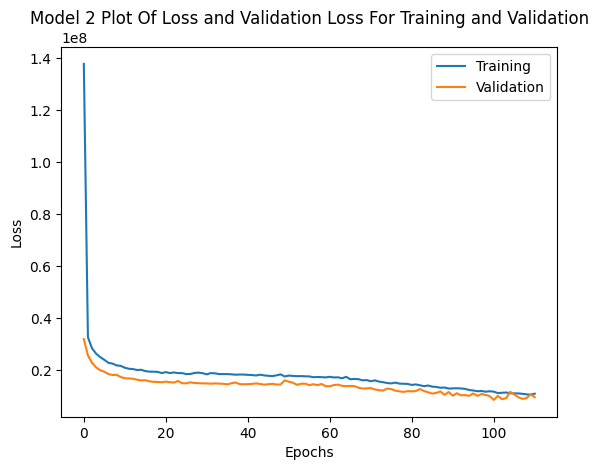

In [273]:
plt.plot(history_df['loss'], label = 'Training')
plt.plot(history_df['val_loss'], label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # print the labels in plot() above
plt.title('Model 2 Plot Of Loss and Validation Loss For Training and Validation')

In [274]:
# You can use the trained model to make predictions on new data
newData = pd.DataFrame({
    'Engine size': [1.0],
    'Year of manufacture': [2006],
    'Mileage': [127869],
    'Manufacturer': ['VW'],
    'Model': ['Polo'],
    'Fuel type': ['Petrol']
})

# Encoding categorical variables for new data
for column, le in label_encoders.items():
    newData[column] = le.transform(newData[column])

# Making predictions on new data
newPrediction = model.predict(newData)
print(f'Predicted Price for new data: {newPrediction[0]}')

1/1 [==============================] - 0s 24ms/step
Predicted Price for new data: [1049405.5]


### HYPERPARAMETER TUNING

We will be tuning with the new Parameters below:
<ul>
<li>Learning Rate of 0.01 which is higher than the default rate of 0.001 used above</li>
<li>Verbose is set to 'auto'</li>
<li>Validation Split of 0.2</li>
<li>We will have 5 hidden layers rather than 3, each with 128 neurons</li>
<li>ReLU activation function</li>
</ul>
    

##### Constructor Stage

In [349]:
model = Sequential() # Create instance
model.add(Dense(units=128, activation='relu', input_shape=(x_combined.shape[1],))) # The first hidden layer
model.add(Dropout(0.2)) # 20% Dropout to the first hidden layer
model.add(Dense(units = 128, activation = 'relu')) # The second hidden layer
model.add(Dense(units = 128, activation = 'relu')) # The third hidden layer
model.add(Dense(units = 128, activation = 'relu')) # The four hidden layer
model.add(Dense(units = 1, activation = 'linear')) # Final Output dense layer 
model.summary() # printing summary of the model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               896       
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,561
Trainable params: 50,561
Non-trai

##### Compilation/Regularization Stage

In [350]:
adamOptimizer = Adam(learning_rate = 0.01) # Creates an instance of the Adam optimizer with 0.01 learning rate

model.compile(optimizer = adamOptimizer,
              loss='mean_squared_error', 
              metrics='mean_squared_error')
earlyStopping = EarlyStopping(monitor='val_loss', patience = 105)

#### Training Stage

In [351]:
history = model.fit(x_train, y_train, 
                    epochs=200, batch_size=None, 
                    verbose = 'auto', validation_split=0.2, 
                    callbacks = [earlyStopping])

Epoch 1/200
1000/1000 [==============================] - 2s 1ms/step - loss: 40723496.0000 - mean_squared_error: 40723496.0000 - val_loss: 17095116.0000 - val_mean_squared_error: 17095116.0000
Epoch 2/200
1000/1000 [==============================] - 1s 1ms/step - loss: 23535920.0000 - mean_squared_error: 23535920.0000 - val_loss: 14345090.0000 - val_mean_squared_error: 14345090.0000
Epoch 3/200
1000/1000 [==============================] - 1s 1ms/step - loss: 20787920.0000 - mean_squared_error: 20787920.0000 - val_loss: 17253494.0000 - val_mean_squared_error: 17253494.0000
Epoch 4/200
1000/1000 [==============================] - 1s 1ms/step - loss: 18163226.0000 - mean_squared_error: 18163226.0000 - val_loss: 9736979.0000 - val_mean_squared_error: 9736979.0000
Epoch 5/200
1000/1000 [==============================] - 1s 1ms/step - loss: 18619790.0000 - mean_squared_error: 18619790.0000 - val_loss: 11856271.0000 - val_mean_squared_error: 11856271.0000
Epoch 6/200
1000/1000 [==============

Epoch 44/200
1000/1000 [==============================] - 1s 1ms/step - loss: 2750556.0000 - mean_squared_error: 2750556.0000 - val_loss: 11580843.0000 - val_mean_squared_error: 11580843.0000
Epoch 45/200
1000/1000 [==============================] - 1s 1ms/step - loss: 2771974.0000 - mean_squared_error: 2771974.0000 - val_loss: 7913885.5000 - val_mean_squared_error: 7913885.5000
Epoch 46/200
1000/1000 [==============================] - 1s 1ms/step - loss: 2947419.2500 - mean_squared_error: 2947419.2500 - val_loss: 17858052.0000 - val_mean_squared_error: 17858052.0000
Epoch 47/200
1000/1000 [==============================] - 1s 1ms/step - loss: 2936158.2500 - mean_squared_error: 2936158.2500 - val_loss: 13097157.0000 - val_mean_squared_error: 13097157.0000
Epoch 48/200
1000/1000 [==============================] - 1s 1ms/step - loss: 2405738.7500 - mean_squared_error: 2405738.7500 - val_loss: 12727408.0000 - val_mean_squared_error: 12727408.0000
Epoch 49/200
1000/1000 [==================

Epoch 87/200
1000/1000 [==============================] - 1s 1ms/step - loss: 1681330.1250 - mean_squared_error: 1681330.1250 - val_loss: 12512390.0000 - val_mean_squared_error: 12512390.0000
Epoch 88/200
1000/1000 [==============================] - 1s 1ms/step - loss: 1644455.6250 - mean_squared_error: 1644455.6250 - val_loss: 12781408.0000 - val_mean_squared_error: 12781408.0000
Epoch 89/200
1000/1000 [==============================] - 1s 1ms/step - loss: 1894226.3750 - mean_squared_error: 1894226.3750 - val_loss: 12097338.0000 - val_mean_squared_error: 12097338.0000
Epoch 90/200
1000/1000 [==============================] - 1s 1ms/step - loss: 1602958.8750 - mean_squared_error: 1602958.8750 - val_loss: 11268601.0000 - val_mean_squared_error: 11268601.0000
Epoch 91/200
1000/1000 [==============================] - 1s 1ms/step - loss: 1835289.6250 - mean_squared_error: 1835289.6250 - val_loss: 16477281.0000 - val_mean_squared_error: 16477281.0000
Epoch 92/200
1000/1000 [================

#### Evaluation Stage

In [352]:
# Making predictions
predictions = model.predict(x_test)

# Lets evaluate our model
loss, mean_squared_error = model.evaluate(x_test, y_test)
r2Score = r2_score(y_test, predictions)

313/313 [==============================] - 0s 718us/step - loss: 17567816.0000 - mean_squared_error: 17567816.0000


In [353]:
print('R2 Score:', r2Score)
print('The Loss:', loss)
print('Mean Squared Error:', mean_squared_error)
rmse = np.sqrt(mean_squared_error)
print(f'Root Mean Squared Error on the test set: {rmse}')

R2 Score: 0.9352637374613161
The Loss: 17567816.0
Mean Squared Error: 17567816.0
Root Mean Squared Error on the test set: 4191.397857517227


In [354]:
# Reshaping for predictions so we can plot the predicted Price using seaborn scatterplot
predictionsReshape = predictions.reshape(len(predictions)) # Converted to 1d array
predictionsReshape.shape


(10000,)

##### Visualization Stage

Text(0.5, 1.0, 'ScatterPlot Of Predicted Price Against Price')

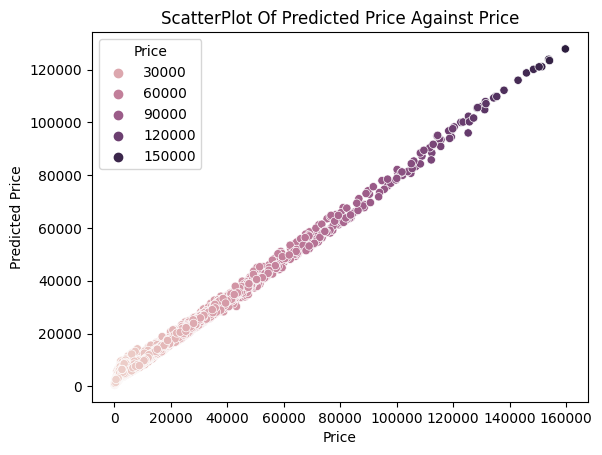

In [355]:
ANNModelThreeScatterPlot = sns.scatterplot(x=y_test, y=predictionsReshape, hue = y_test)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('ScatterPlot Of Predicted Price Against Price')

In [356]:
# Next, plot the history of the training and validation losses against the epoch.
history_df = pd.DataFrame(history.history) # converting measures to dataframe    
history_df

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,4.072350e+07,4.072350e+07,17095116.0,17095116.0
1,2.353592e+07,2.353592e+07,14345090.0,14345090.0
2,2.078792e+07,2.078792e+07,17253494.0,17253494.0
3,1.816323e+07,1.816323e+07,9736979.0,9736979.0
4,1.861979e+07,1.861979e+07,11856271.0,11856271.0
...,...,...,...,...
127,1.504030e+06,1.504030e+06,14758058.0,14758058.0
128,1.486704e+06,1.486704e+06,14785231.0,14785231.0
129,1.329256e+06,1.329256e+06,14904058.0,14904058.0
130,1.418520e+06,1.418520e+06,13898879.0,13898879.0


Text(0.5, 1.0, 'Model 3 Plot Of Loss and Validation Loss For Training and Validation')

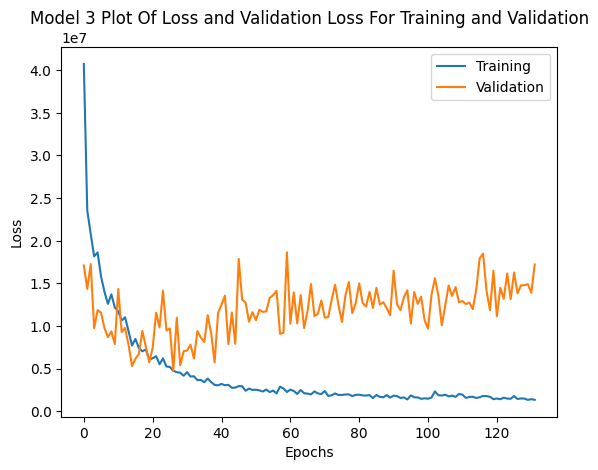

In [357]:
plt.plot(history_df['loss'], label = 'Training')
plt.plot(history_df['val_loss'], label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # print the labels in plot() above
plt.title('Model 3 Plot Of Loss and Validation Loss For Training and Validation')

### E.  BEST MODEL FOR PREDICTION?

Based on the results of your analysis, what is the best model for predicting the price of a car and why? You should use suitable figures and evaluation metrics to support your conclusions.

## ANALYSING SECOND HAND CAR SALES DATA USING UNSUPERVISED LEARNING MODEL

### F. K-MEANS CLUSTERING MODEL

We will build our Clustering model, using the k-Means Clustering algorithm, for each numerical feature against Price.

### i. k-Means Clustering – Price versus Mileage

In [374]:
feature_names = ['Mileage', 'Price'] # defining list of features
x = carSalesDataFrame[feature_names] # extracting features

In [375]:
# Standardizing the dataset
scale = StandardScaler() # create the instance
scale.fit(x) # train and fit 
x_scaled = scale.transform(x) # transform the data

In [376]:
# Training the model
SSE= [] # inertia SSE is the distance of the points from the cluster center
for k in range (1,10):
    kmeans = KMeans(n_clusters = k, random_state = 42) # we use 42 to randomize dataset
    kmeans.fit(x_scaled)
    inertia = kmeans.inertia_
    SSE.append(inertia)

In [377]:
SSE

[100000.00000000001,
 49097.54278205106,
 29354.608531905265,
 19633.969301171022,
 13964.694697351162,
 10750.413103554703,
 8712.674276791437,
 7405.388665601022,
 6398.341250833321]

In [378]:
# plotting the number of clustes
plotCarSalesDataFrame = pd.DataFrame({"Cluster":range(1,10), "SSE": SSE})
plotCarSalesDataFrame

,Cluster,SSE
0,1,100000.000000
1,2,49097.542782
2,3,29354.608532
3,4,19633.969301
4,5,13964.694697
5,6,10750.413104
6,7,8712.674277
7,8,7405.388666
8,9,6398.341251


Text(0, 0.5, 'SSE')

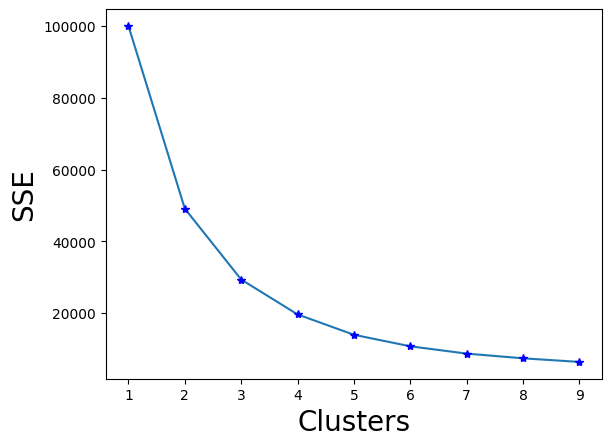

In [379]:
plt.plot(plotCarSalesDataFrame["Cluster"], plotCarSalesDataFrame["SSE"]) # You can comment out if you want
plt.plot("Cluster", "SSE", "b*", data = plotCarSalesDataFrame) # make it blue and use astericks using "b*"
plt.xlabel("Clusters", fontsize = 20)
plt.ylabel("SSE", fontsize = 20)

**We can use either 2, 3 and 4 to test for the optimal number.**

But we will also need to test before we decide which is optimal, which we will be doing in the next stage.

In [380]:
## fitting based on the number of k when k = 2
k = 2
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
clusterLabelsPred = kmeans.predict(x_scaled)

In [381]:
# Evaluating of the clustering
DBScoreForTwo = davies_bouldin_score(x_scaled,clusterLabelsPred) # the scaled dataset
SScoreForTwo = silhouette_score(x_scaled, clusterLabelsPred) 
print(f"DBScoreForTwo:{DBScoreForTwo:.2f}, SScoreForTwo:{SScoreForTwo:.2f}")

DBScoreForTwo:0.76, SScoreForTwo:0.49


In [382]:
## fitting based on the number of k when k = 3
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
clusterLabelsPred = kmeans.predict(x_scaled)

In [383]:
# Evaluating of the clustering
DBScoreForThree = davies_bouldin_score(x_scaled,clusterLabelsPred)
SScoreForThree = silhouette_score(x_scaled, clusterLabelsPred)
print(f"DBScoreForThree:{DBScoreForThree:.2f}, SScoreForThree:{SScoreForThree:.2f}, ")

DBScoreForThree:0.69, SScoreForThree:0.48, 


In [384]:
## fitting based on the number of k when k = 4
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
clusterLabelsPred = kmeans.predict(x_scaled)

In [385]:
# Evaluating of the clustering
DBScoreForFour = davies_bouldin_score(x_scaled,clusterLabelsPred) # the scaled dataset
SScoreForFour = silhouette_score(x_scaled, clusterLabelsPred) 
print(f"DBScoreForFour:{DBScoreForFour:.2f}, SScoreForFour:{SScoreForFour:.2f}")

DBScoreForFour:0.66, SScoreForFour:0.47


    The Optimal number of clusters (k) is 2 as it has the highest DBScore of 0.76.

In [386]:
clusterLabelsPred = kmeans.predict(x_scaled)
clusterLabelsPred

array([2, 1, 1, ..., 3, 1, 2])

In [387]:
# Now that we have the predictions for the cluster labels, we can evaluate the model. 
# We Calculate the Davies Bouldin index and the Silhouette Coefficient for this model. 
# Based on these metrics, how good is the clustering predicted by this model?

DBScore = davies_bouldin_score(x_scaled,clusterLabelsPred)
SScore = silhouette_score(x_scaled, clusterLabelsPred)
print(f'DBScoreFor_clusterLabelsPred:{DBScore}')
print(f'SScoreForFour_clusterLabelsPred:{SScore}')


DBScoreFor_clusterLabelsPred:0.6577480718466798
SScoreForFour_clusterLabelsPred:0.47028122124531085


In [388]:
# FWe can now create a scatter plot that visualises the clusters predicted by the k-Means model. 
# Now we need understand the interpretation of the clusters that have been identified with this model?
x

,Mileage,Price
0,127300,3074
1,57850,49704
2,39190,24072
3,210814,1705
4,127869,4101
...,...,...
49995,28664,113006
49996,105120,9430
49997,4030,49852
49998,26468,23630


Text(0.5, 1.0, 'Clusters Plot For Price Against Mileage')

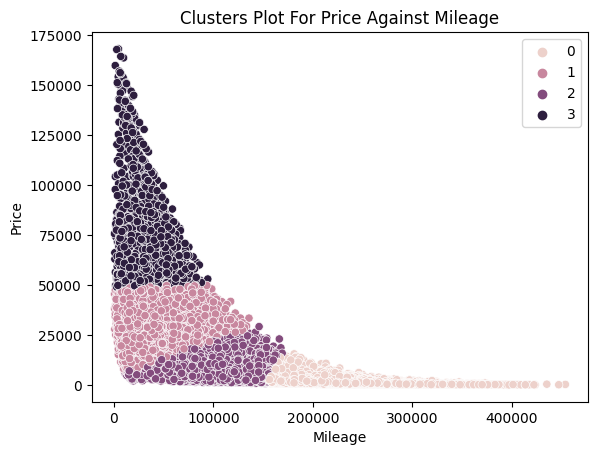

In [389]:
priceMileageClusterPlot = sns.scatterplot(data = carSalesDataFrame, x = 'Mileage', y = 'Price', hue = clusterLabelsPred)
plt.title('Clusters Plot For Price Against Mileage')

##### Now we need understand the interpretation of the clusters that have been identified with this model?

In [390]:
clusterData = pd.concat([x,pd.Series(clusterLabelsPred)], axis = 1)
clusterData.columns = ['Mileage', 'Price', 'Cluster']
clusterData


,Mileage,Price,Cluster
0,127300,3074,2
1,57850,49704,1
2,39190,24072,1
3,210814,1705,0
4,127869,4101,2
...,...,...,...
49995,28664,113006,3
49996,105120,9430,2
49997,4030,49852,3
49998,26468,23630,1


In [391]:
# We will be fitting our dataset into columns that indicate lowLifeLowGDP,  mediumLifeLowGDP and highLifeLowGDP
multipleConditionLambda = lambda x: 'highPriceLowMileage' if x == 0 else ('lowPriceLowMileage' if x == 1
                                                                     else 'highPriceLowMileage' if x == 2
                                                                     else 'lowPriceHighMileage')

clusterData['Cluster_'] = clusterData['Cluster'].apply(multipleConditionLambda)
clusterData

,Mileage,Price,Cluster,Cluster_
0,127300,3074,2,highPriceLowMileage
1,57850,49704,1,lowPriceLowMileage
2,39190,24072,1,lowPriceLowMileage
3,210814,1705,0,highPriceLowMileage
4,127869,4101,2,highPriceLowMileage
...,...,...,...,...
49995,28664,113006,3,lowPriceHighMileage
49996,105120,9430,2,highPriceLowMileage
49997,4030,49852,3,lowPriceHighMileage
49998,26468,23630,1,lowPriceLowMileage


### ii. k-Means Clustering – Price versus Year of manufacture

In [392]:
feature_names = ['Year of manufacture', 'Price']
x = carSalesDataFrame[feature_names]


scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

from sklearn.cluster import KMeans
SSE= [] # inertia SSE is the distance of the points from the cluster center
for k in range (1,10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_scaled)
    inertia = kmeans.inertia_
    SSE.append(inertia)
    
# plotting the number of clustes
plotCarSalesDataFrame = pd.DataFrame({'Cluster':range(1,10), 'SSE': SSE})
plotCarSalesDataFrame


,Cluster,SSE
0,1,100000.000000
1,2,42298.776361
2,3,25419.623972
3,4,16409.201224
4,5,11742.716567
5,6,9095.872945
6,7,7542.092444
7,8,6415.701370
8,9,5643.002388


Text(0, 0.5, 'SSE')

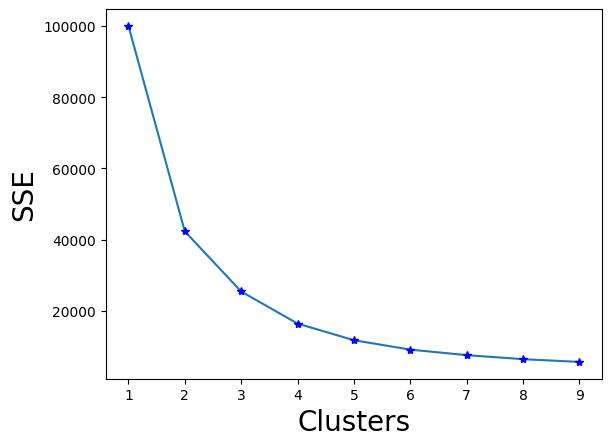

In [393]:
plt.plot(plotCarSalesDataFrame['Cluster'], plotCarSalesDataFrame['SSE'])
plt.plot('Cluster', 'SSE', 'b*', data = plotCarSalesDataFrame)
plt.xlabel('Clusters', fontsize = 20)
plt.ylabel('SSE', fontsize = 20)

**We can use either 2, 3 and 4 to test for the optimal number.**

But we will also need to test before we decide which is optimal, which we will be doing in the next stage.

In [394]:
## fitting based on the number of k when k = 2
k = 2
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
clusterLabelsPred = kmeans.predict(x_scaled)

In [395]:
# Evaluating of the clustering
DBScoreForTwo = davies_bouldin_score(x_scaled,clusterLabelsPred) # the scaled dataset
SScoreForTwo = silhouette_score(x_scaled, clusterLabelsPred) 
print(f"DBScoreForTwo:{DBScoreForTwo:.2f}, SScoreForTwo:{SScoreForTwo:.2f}")

DBScoreForTwo:0.68, SScoreForTwo:0.55


In [396]:
## fitting based on the number of k when k = 3
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
clusterLabelsPred = kmeans.predict(x_scaled)

In [397]:
# Evaluating of the clustering
DBScoreForThree = davies_bouldin_score(x_scaled,clusterLabelsPred)
SScoreForThree = silhouette_score(x_scaled, clusterLabelsPred)
print(f"DBScoreForThree:{DBScoreForThree:.2f}, SScoreForThree:{SScoreForThree:.2f}, ")

DBScoreForThree:0.69, SScoreForThree:0.51, 


In [398]:
## fitting based on the number of k when k = 4
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
clusterLabelsPred = kmeans.predict(x_scaled)

In [399]:
# Evaluating of the clustering
DBScoreForFour = davies_bouldin_score(x_scaled,clusterLabelsPred) # the scaled dataset
SScoreForFour = silhouette_score(x_scaled, clusterLabelsPred) 
print(f"DBScoreForFour:{DBScoreForFour:.2f}, SScoreForFour:{SScoreForFour:.2f}")

DBScoreForFour:0.64, SScoreForFour:0.50


    The Optimal number of clusters (k) is 3 as it has the highest DBScore of 0.69.

Text(0.5, 1.0, 'Clusters Plot For Price Against Year of Manufacture')

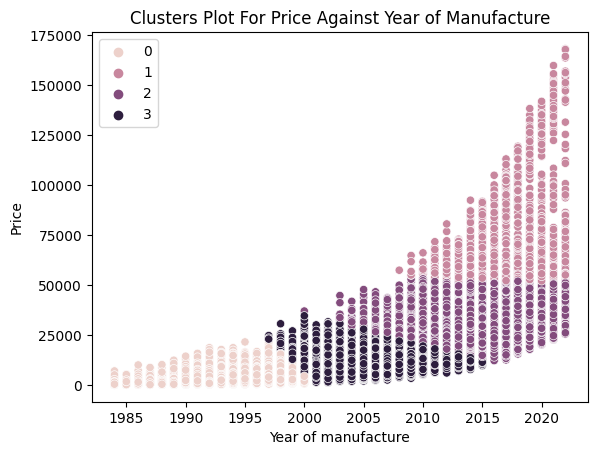

In [400]:
priceYearofManufactureClustersPlot = sns.scatterplot(data = carSalesDataFrame, x = 'Year of manufacture', y = 'Price', hue = clusterLabelsPred)
plt.title('Clusters Plot For Price Against Year of Manufacture')

In [401]:
clusterData = pd.concat([x,pd.Series(clusterLabelsPred)], axis = 1)
clusterData.columns = ['Year of manufacture', 'Price', 'Cluster']
clusterData

,Year of manufacture,Price,Cluster
0,2002,3074,3
1,2016,49704,2
2,2014,24072,2
3,1988,1705,0
4,2006,4101,3
...,...,...,...
49995,2018,113006,1
49996,2003,9430,3
49997,2022,49852,2
49998,2016,23630,2


In [402]:
# We will be fitting our dataset into columns that indicate oldYearLowPrice,  recentYearHighPrice, recentYearMediumPrice and recentYearHighPrice
multipleConditionLambda = lambda x: "oldYearLowPrice" if x == 0 else ("recentYearHighPrice" if x == 1
                                                                     else "recentYearMediumPrice" if x == 2
                                                                     else "recentYearHighPrice")

clusterData['Cluster_'] = clusterData['Cluster'].apply(multipleConditionLambda)
clusterData

,Year of manufacture,Price,Cluster,Cluster_
0,2002,3074,3,recentYearHighPrice
1,2016,49704,2,recentYearMediumPrice
2,2014,24072,2,recentYearMediumPrice
3,1988,1705,0,oldYearLowPrice
4,2006,4101,3,recentYearHighPrice
...,...,...,...,...
49995,2018,113006,1,recentYearHighPrice
49996,2003,9430,3,recentYearHighPrice
49997,2022,49852,2,recentYearMediumPrice
49998,2016,23630,2,recentYearMediumPrice


### iii. k-Means Clustering – Price versus Engine Size

In [403]:
feature_names = ['Engine size', 'Price']
x = carSalesDataFrame[feature_names]

########################from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

from sklearn.cluster import KMeans
SSE= [] # inertia SSE is the distance of the points from the cluster center
for k in range (1,10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_scaled)
    inertia = kmeans.inertia_
    SSE.append(inertia)
    
# plotting the number of clustes
plotCarSalesDataFrame = pd.DataFrame({'Cluster':range(1,10), 'SSE': SSE})
plotCarSalesDataFrame


,Cluster,SSE
0,1,100000.000000
1,2,57276.309330
2,3,41560.391337
3,4,29387.069755
4,5,21668.812270
5,6,17635.054811
6,7,15296.902413
7,8,13540.758451
8,9,11819.486442


Text(0, 0.5, 'SSE')

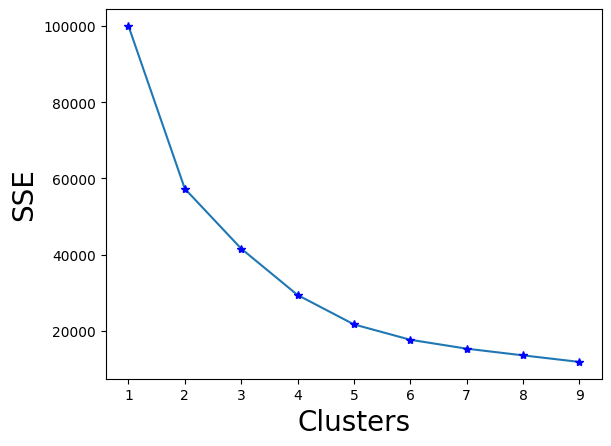

In [404]:
plt.plot(plotCarSalesDataFrame['Cluster'], plotCarSalesDataFrame['SSE'])
plt.plot('Cluster', 'SSE', 'b*', data = plotCarSalesDataFrame)
plt.xlabel('Clusters', fontsize = 20)
plt.ylabel('SSE', fontsize = 20)


**We can use either 2, 3 and 4 to test for the optimal number.**

But we will also need to test before we decide which is optimal, which we will be doing in the next stage.

In [405]:
## fitting based on the number of k when k = 2
k = 2
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
clusterLabelsPred = kmeans.predict(x_scaled)

In [406]:
# Evaluating of the clustering
DBScoreForTwo = davies_bouldin_score(x_scaled,clusterLabelsPred) # the scaled dataset
SScoreForTwo = silhouette_score(x_scaled, clusterLabelsPred) 
print(f"DBScoreForTwo:{DBScoreForTwo:.2f}, SScoreForTwo:{SScoreForTwo:.2f}")

DBScoreForTwo:0.94, SScoreForTwo:0.62


In [407]:
## fitting based on the number of k when k = 3
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
clusterLabelsPred = kmeans.predict(x_scaled)

In [408]:
# Evaluating of the clustering
DBScoreForThree = davies_bouldin_score(x_scaled,clusterLabelsPred)
SScoreForThree = silhouette_score(x_scaled, clusterLabelsPred)
print(f"DBScoreForThree:{DBScoreForThree:.2f}, SScoreForThree:{SScoreForThree:.2f} ")

DBScoreForThree:0.90, SScoreForThree:0.47, 


In [409]:
## fitting based on the number of k when k = 4
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(x_scaled)
clusterLabelsPred = kmeans.predict(x_scaled)

In [410]:
# Evaluating of the clustering
DBScoreForFour = davies_bouldin_score(x_scaled,clusterLabelsPred) # the scaled dataset
SScoreForFour = silhouette_score(x_scaled, clusterLabelsPred) 
print(f"DBScoreForFour:{DBScoreForFour:.2f}, SScoreForFour:{SScoreForFour:.2f}")

DBScoreForFour:0.76, SScoreForFour:0.49


    The Optimal number of clusters (k) is 2 as it has the highest DBScore of 0.94.

Text(0.5, 1.0, 'Clusters Plot For Price Against Mileage')

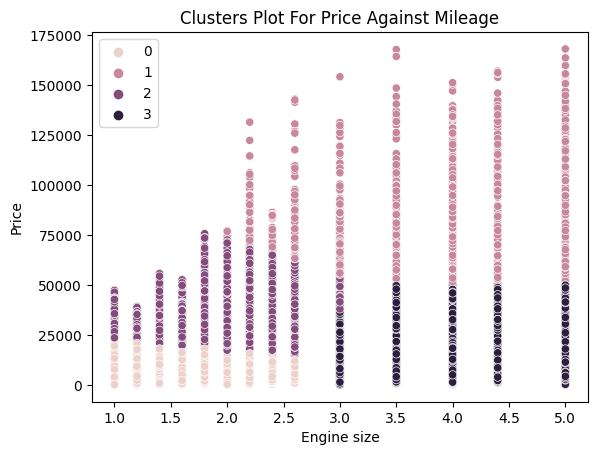

In [411]:
priceEngineSizeClustersPlot = sns.scatterplot(data = carSalesDataFrame, x = 'Engine size', y = 'Price', hue = clusterLabelsPred)
plt.title('Clusters Plot For Price Against Mileage')

In [412]:
clusterData = pd.concat([x,pd.Series(clusterLabelsPred)], axis = 1)
clusterData.columns = ['Engine size', 'Price', 'Cluster']
clusterData


,Engine size,Price,Cluster
0,1.0,3074,0
1,4.0,49704,3
2,1.6,24072,2
3,1.8,1705,0
4,1.0,4101,0
...,...,...,...
49995,5.0,113006,1
49996,1.8,9430,0
49997,1.6,49852,2
49998,1.0,23630,2


In [413]:
# We will be fitting our dataset into columns that indicate smallEngineSizeLowPrice,  smallEngineSizeLowPrice and largeEngineSizeHighPrice
multipleConditionLambda = lambda x: "smallEngineSizeLowPrice" if x == 0 else ("smallEngineSizeLowPrice" if x == 1
                                                                     else "smallEngineSizeLowPrice" if x == 2
                                                                     else "largeEngineSizeHighPrice")

clusterData['Cluster_'] = clusterData['Cluster'].apply(multipleConditionLambda)
clusterData

,Engine size,Price,Cluster,Cluster_
0,1.0,3074,0,smallEngineSizeLowPrice
1,4.0,49704,3,largeEngineSizeHighPrice
2,1.6,24072,2,smallEngineSizeLowPrice
3,1.8,1705,0,smallEngineSizeLowPrice
4,1.0,4101,0,smallEngineSizeLowPrice
...,...,...,...,...
49995,5.0,113006,1,smallEngineSizeLowPrice
49996,1.8,9430,0,smallEngineSizeLowPrice
49997,1.6,49852,2,smallEngineSizeLowPrice
49998,1.0,23630,2,smallEngineSizeLowPrice


Have we found if the optimal number of clusters is the same as what you found in Exercise 2?

### G. COMPARING K-MEANS CLUSTERING MODEL WITH DBSCAN MODEL

In [414]:
dbscan = DBSCAN(eps=0.2, min_samples=3) # Create the instance
dbscan_labels_pred = dbscan.fit_predict(x_scaled) # Predict the cliuster

In [415]:
# Evaluating the clusters
db_score_dbscan = davies_bouldin_score(x_scaled, dbscan_labels_pred) # the scaled dataset and the cluster_labels(internal evaluation)
sil_score_dbscan = silhouette_score(x_scaled, dbscan_labels_pred)
print(f'Davies Bouldin Score DBScan: {db_score_dbscan:.2f}, Silhouette Score DBScan: {sil_score_dbscan:.2f} ')


Davies Bouldin Score DBScan: 2.64, Silhouette Score DBScan: 0.06 


DB Score of 2.64 which is higher than that of K-Means and a Silhouette Score of 0.06 which is lower than K-Means.

**Therefore DBSCAN has not done very well for the clustering**

### DBSCAN – Price versus Mileage 

Text(0.5, 1.0, 'DBScan Plot For Price Against Mileage')

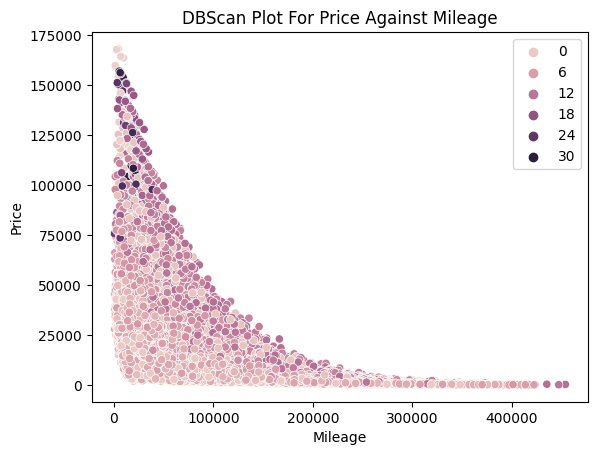

In [416]:
feature_names = ['Mileage', 'Price']
x = carSalesDataFrame[feature_names]
priceMileageDBScanPlot = sns.scatterplot(data = x, x = 'Mileage', y = 'Price', hue = dbscan_labels_pred)
plt.title('DBScan Plot For Price Against Mileage')

### DBSCAN – Price versus Year of manufacture 

Text(0.5, 1.0, 'DBScan Plot For Price Against Mileage')

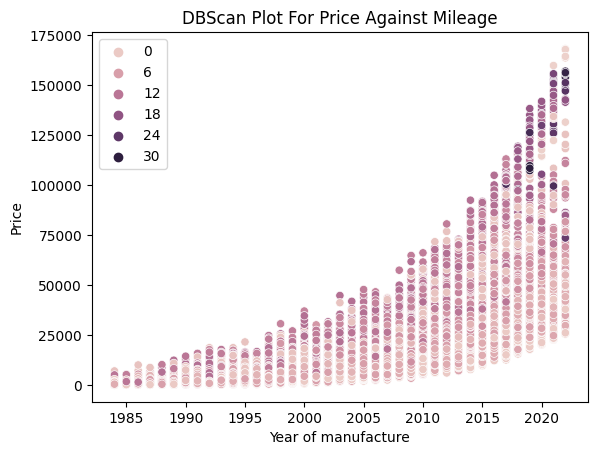

In [417]:
feature_names = ['Year of manufacture', 'Price']
x = carSalesDataFrame[feature_names]
# plt.title('DBSCAN – Year of manufacture versus Price')
priceYearofManufactureDBScan = sns.scatterplot(data = x, x = 'Year of manufacture', y = 'Price', hue = dbscan_labels_pred)
# plt.show()
plt.title('DBScan Plot For Price Against Mileage')

### DBSCAN – Price versus Engine size 

Text(0.5, 1.0, 'DBScan Plot For Price Against Engine Size')

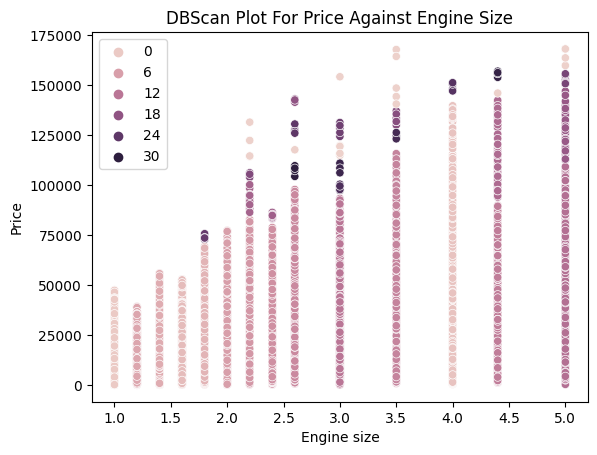

In [418]:
feature_names = ['Engine size', 'Price']
x = carSalesDataFrame[feature_names]
priceEngineSizeDBScan = sns.scatterplot(data = x, x = 'Engine size', y = 'Price', hue = dbscan_labels_pred)
plt.title('DBScan Plot For Price Against Engine Size')

**It shows different points of clusters on there own, it indicates a lot of outliers and indicating them as -1 and it has not done well.**

<font color ='red'><h3> Which algorithm produces the best clustering? Use suitable evaluation metrics to justify your answer.</h3></font>

In [317]:
# All pictures of plot will be generated and save to computer
try:
    carPriceHistogram.get_figure().savefig('./carPriceHistogram.png')
    priceVSManufacturerPlot.get_figure().savefig('./priceVSManufacturerPlot.png')
    priceVSModelPlot.get_figure().savefig('./priceVSModelPlot.png')
    priceEngineSizePlot.get_figure().savefig('./priceEngineSizePlot.png')
    priceFuelTypePlot.get_figure().savefig('./priceFuelTypePlot.png')
    priceYearofManufacturePlot.get_figure().savefig('./priceYearofManufacturePlot.png')
    priceVSMileagePlot.get_figure().savefig('./priceVSMileagePlot.png')
    
    allFeaturesHeatmapPlot.get_figure().savefig('./allFeaturesHeatmapPlot.png')
    # numericalFeaturesHeatmapPlot.get_figure().savefig('./numericalFeaturesHeatmapPlot.png')
    priceFuelTypeBoxplot.get_figure().savefig('./priceFuelTypeBoxplot.png')
    
    priceModelBoxplot.get_figure().savefig('./priceModelBoxplot.png')
    priceManufacturerBoxplot.get_figure().savefig('./priceManufacturerBoxplot.png')
    
    priceMileageScatterplot.get_figure().savefig('./priceMileageScatterplot.png')
    priceYearofManfactureScatterplot.get_figure().savefig('./priceYearofManfactureScatterplot.png')
    priceEngineSizeScatterplot.get_figure().savefig('./priceEngineSizeScatterplot.png')

    ANNModelOneScatterPlot.get_figure().savefig('./ANNModelOneScatterPlot.png')
    ANNModelTwoScatterPlot.get_figure().savefig('./ANNModelTwoScatterPlot.png')
    ANNModelThreeScatterPlot.get_figure().savefig('./ANNModelThreeScatterPlot.png')    

    priceMileageClusterPlot.get_figure().savefig('./priceMileageClusterPlot.png')
    priceYearofManufactureClustersPlot.get_figure().savefig('./priceYearofManufactureClustersPlot.png')
    priceEngineSizeClustersPlot.get_figure().savefig('./priceEngineSizeClustersPlot.png')    

    priceMileageDBScanPlot.get_figure().savefig('./priceMileageDBScanPlot.png')
    priceYearofManufactureDBScan.get_figure().savefig('./priceYearofManufactureDBScan.png')
    priceEngineSizeDBScan.get_figure().savefig('./priceEngineSizeDBScan.png')  
    print('All plots file have been saved as .png image succefully to computer')  # If successful Print when successful 
except Exception as error:                        # Checking for errors
    print('Unsuccesful, failed to save ')       # Then Print when successful 
    print(type(error))


All plots file have been saved as .png image succefully to computer


##### REFERENCES 

##### Sci Kit Supervised learning Documentation. Available online: https://scikitlearn.org/stable/supervised_learning.html [Accessed 23/12/2023].

##### Sci Kit Unsupervised learning Documentation. Available online: https://scikit-learn.org/stable/unsupervised_learning.html [Accessed 10/1/2024].
